In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle
from random import sample

# from utils import *
from utils_v4 import *

In [2]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models'



train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)

# train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256,lower_band = 4, higher_band =8)

In [3]:
# Balance Validation Dataset
sleep_files = []
move_files = []
for t in range(len(val_files)):
    if 'sleep' in val_files[t][0]:
        sleep_files.append(val_files[t])
    if 'move' in val_files[t][0]:
        move_files.append(val_files[t])

sleep_sample = sample(sleep_files, len(move_files))
val_2_files = sleep_sample+move_files



In [4]:
##Theta band: 4-8 Hz
train_loader_theta, val_loader_theta, test_loader_theta = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,lower_band = 4, higher_band =8)
print('theta:', len(train_loader_theta), len(val_loader_theta), len(test_loader_theta))

##Beta band: 15-30 Hz
train_loader_beta, val_loader_beta, test_loader_beta = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,lower_band = 15, higher_band =30)
print('beta:', len(train_loader_beta), len(val_loader_beta), len(test_loader_beta))

##Gamma band: 35 - 60 Hz 
train_loader_gamma, val_loader_gamma, test_loader_gamma = create_dataloaders(train_files, val_2_files, test_files,load_path, batch_size=256,lower_band = 35, higher_band =60)
print('gamma:', len(train_loader_gamma), len(val_loader_gamma), len(test_loader_gamma))



theta: 78 11 25
beta: 78 11 25
gamma: 78 11 25


In [5]:
## Check balance
# count_sleep = 0
# count_move = 0
# for t in range(len(val_2_files)):
#     if 'sleep' in val_2_files[t][0]:
#         count_sleep+=1
#     if 'move' in val_2_files[t][0]:
#         count_move +=1 
# print(count_sleep, count_move)

In [5]:
print("theta: ")
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader_theta): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break
print("beta: ")
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader_beta): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break
print("gamma: ")
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader_gamma): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

theta: 
torch.Size([256, 62, 5, 10])
torch.Size([256, 1])
256
256
256
beta: 
torch.Size([256, 62, 16, 10])
torch.Size([256, 1])
256
256
256
gamma: 
torch.Size([256, 62, 26, 10])
torch.Size([256, 1])
256
256
256


date:180323, rec:007, time:4812.0


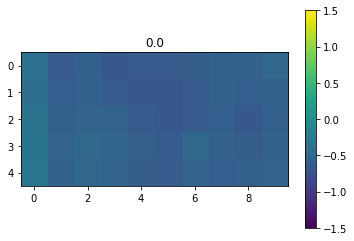

date:180324, rec:008, time:4494.0


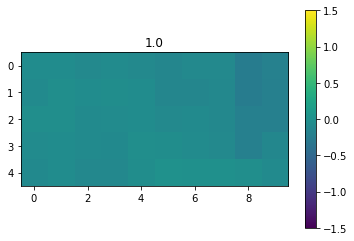

date:180325, rec:001, time:1900.0


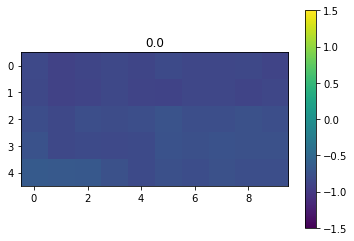

date:180324, rec:008, time:5234.0


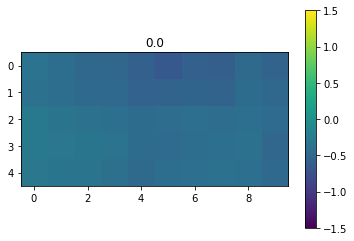

date:180401, rec:001, time:3383.0


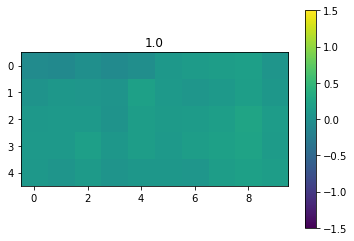

date:180323, rec:003, time:3571.0


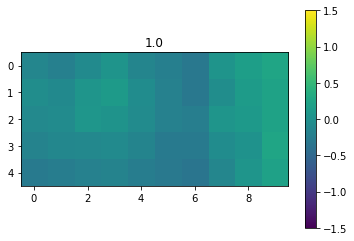

date:180325, rec:006, time:3363.0


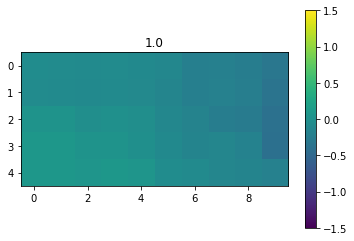

date:180324, rec:009, time:1762.0


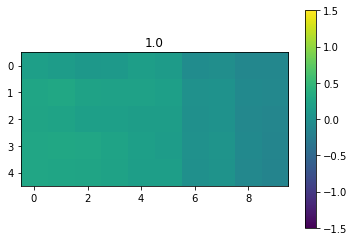

date:180323, rec:001, time:7033.0


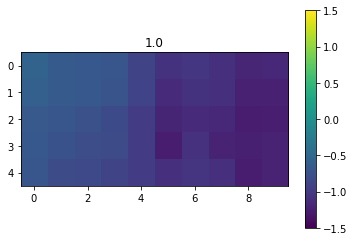

date:180325, rec:007, time:3256.0


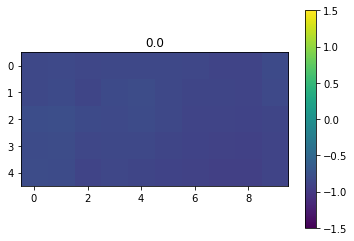

date:180325, rec:001, time:6821.0


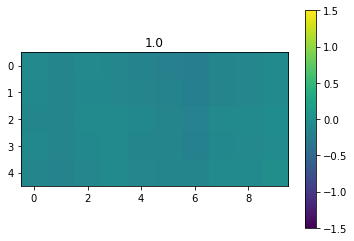

date:180401, rec:001, time:4086.0


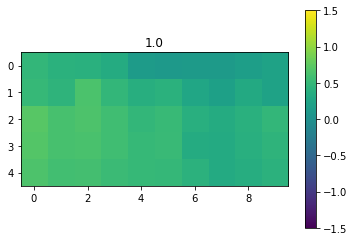

date:180325, rec:007, time:1733.0


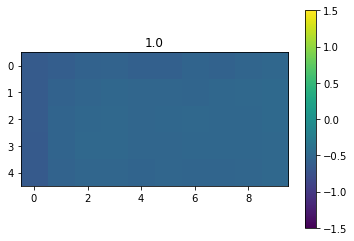

date:180322, rec:003, time:1703.0


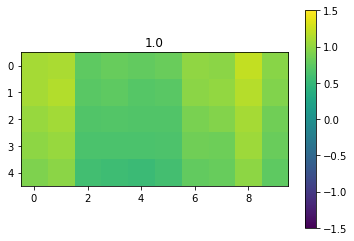

date:180322, rec:004, time:3938.0


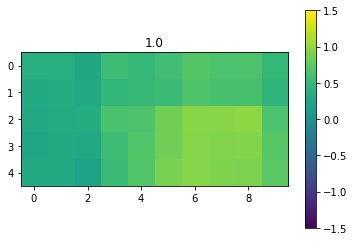

date:180324, rec:001, time:2111.0


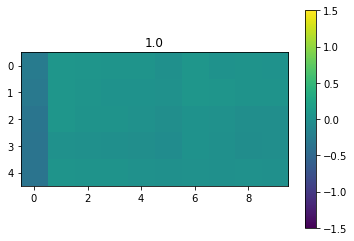

date:180401, rec:002, time:2446.0


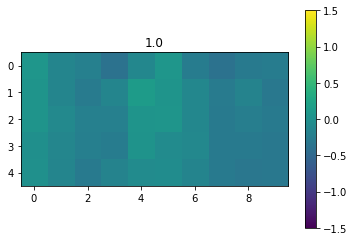

date:180323, rec:005, time:2697.0


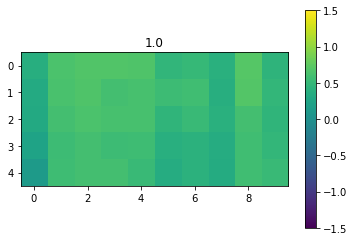

date:180401, rec:001, time:1200.0


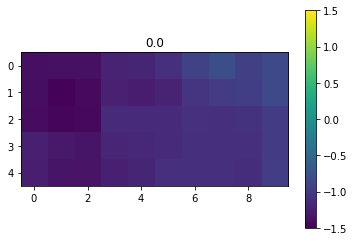

date:180323, rec:003, time:887.0


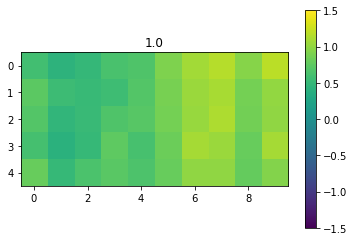

date:180322, rec:007, time:3319.0


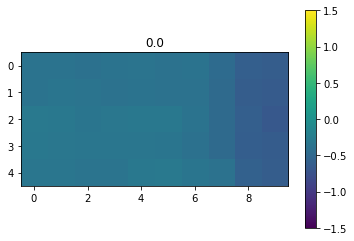

date:180322, rec:004, time:5983.0


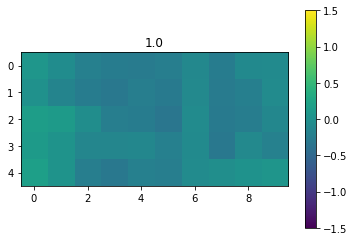

date:180325, rec:004, time:6197.0


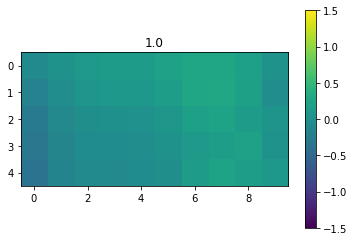

date:180324, rec:008, time:6134.0


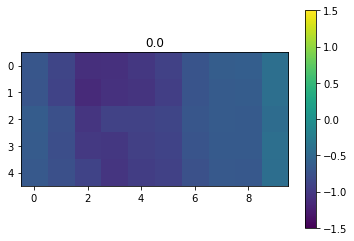

date:180325, rec:007, time:3016.0


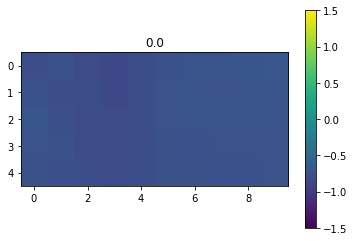

date:180324, rec:006, time:5596.0


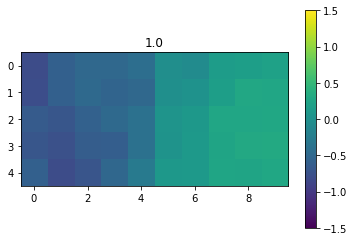

date:180322, rec:005, time:6869.0


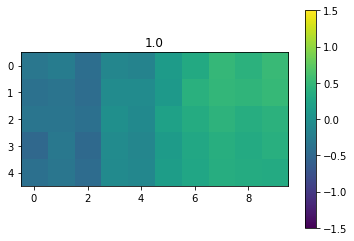

date:180325, rec:007, time:3972.0


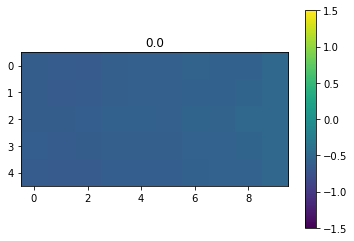

date:180323, rec:003, time:3631.0


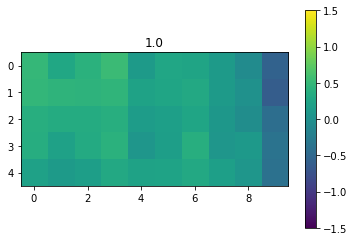

date:180322, rec:003, time:5645.0


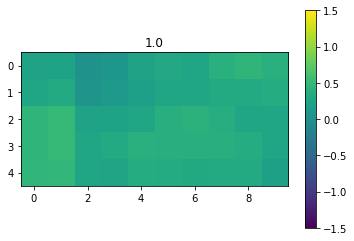

date:180325, rec:007, time:3016.0


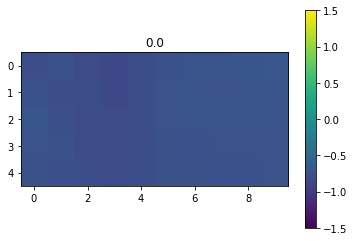

date:180324, rec:004, time:5606.0


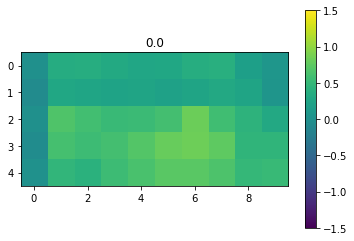

date:180324, rec:006, time:3219.0


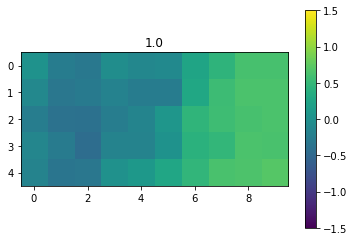

date:180325, rec:009, time:4879.0


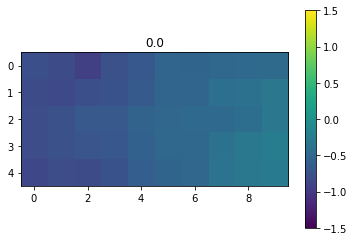

date:180324, rec:008, time:1961.0


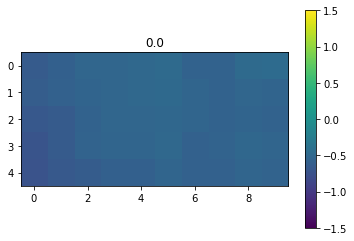

date:180324, rec:004, time:2269.0


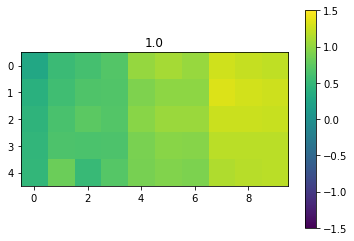

date:180325, rec:004, time:3380.0


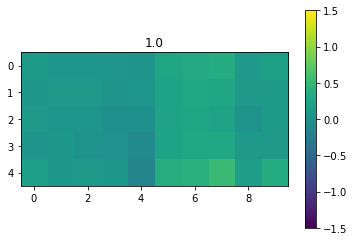

date:180324, rec:009, time:810.0


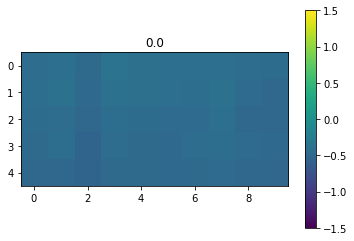

date:180325, rec:005, time:4196.0


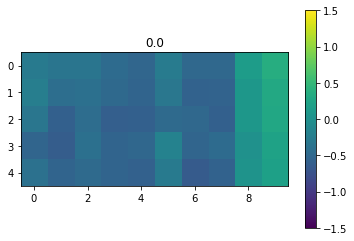

date:180325, rec:004, time:3300.0


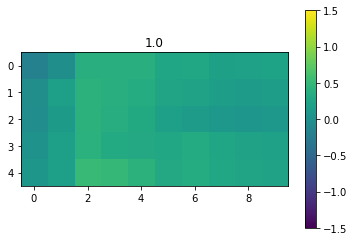

date:180324, rec:008, time:401.0


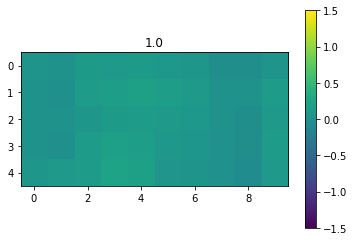

date:180401, rec:001, time:6683.0


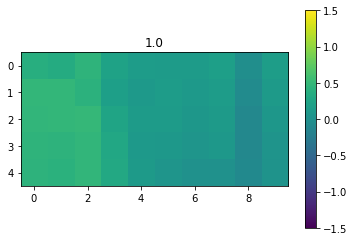

date:180325, rec:001, time:5437.0


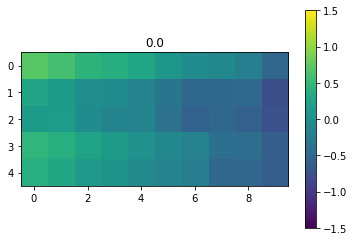

date:180325, rec:002, time:2845.0


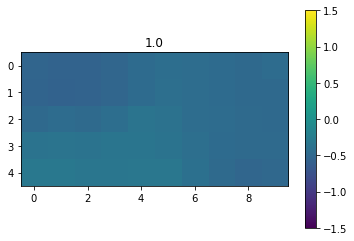

date:180322, rec:004, time:6706.0


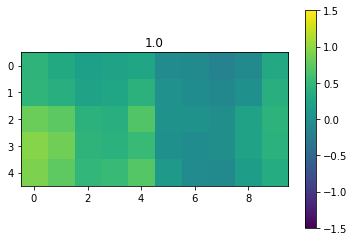

date:180401, rec:002, time:2516.0


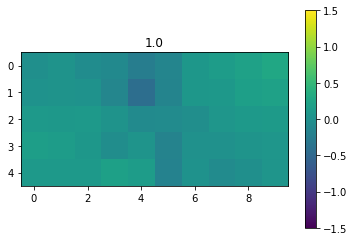

date:180324, rec:008, time:5464.0


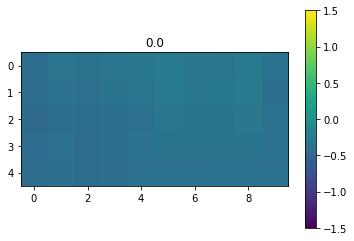

date:180325, rec:003, time:6107.0


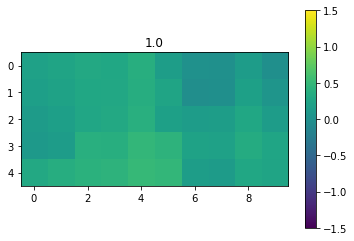

date:180325, rec:009, time:6139.0


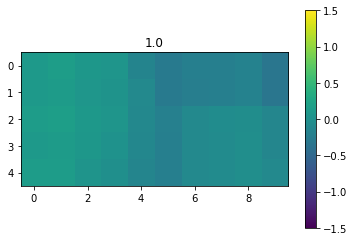

date:180323, rec:007, time:5711.0


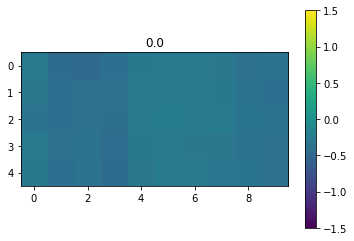

date:180322, rec:007, time:4360.0


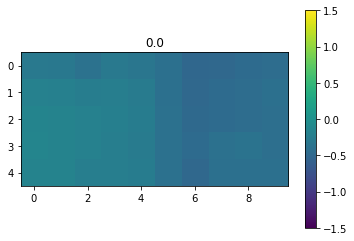

date:180324, rec:004, time:1729.0


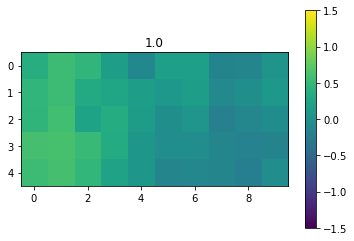

date:180325, rec:006, time:7166.0


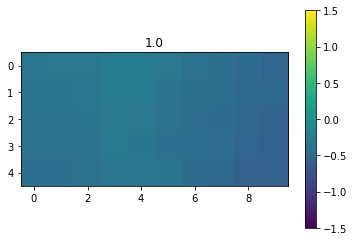

date:180325, rec:003, time:390.0


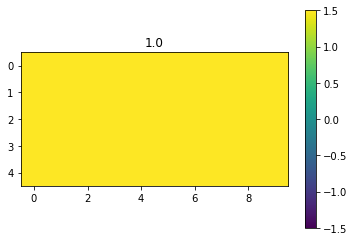

date:180323, rec:002, time:6411.0


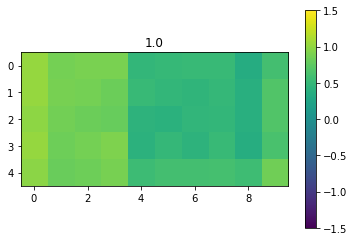

date:180322, rec:007, time:2303.0


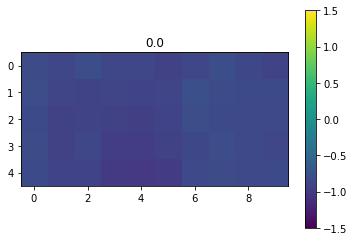

date:180322, rec:005, time:1815.0


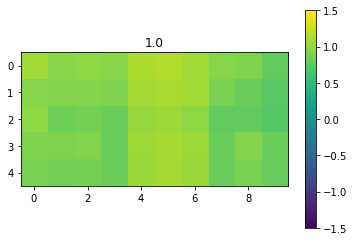

date:180324, rec:009, time:800.0


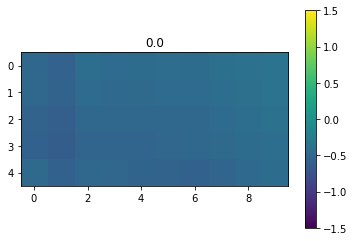

date:180325, rec:007, time:1853.0


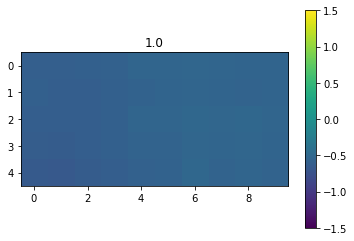

date:180322, rec:004, time:6636.0


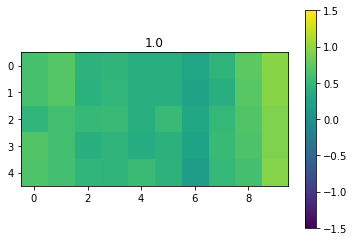

date:180325, rec:001, time:6521.0


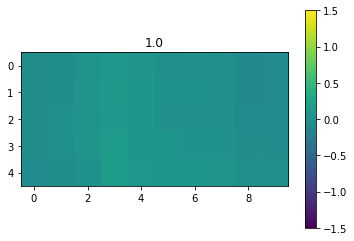

date:180323, rec:002, time:930.0


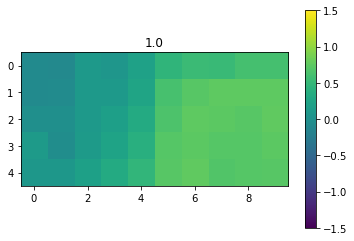

date:180324, rec:008, time:2231.0


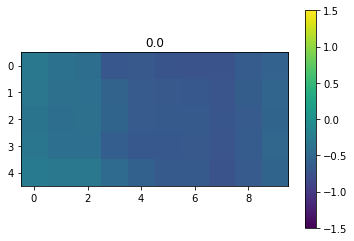

date:180324, rec:001, time:2985.0


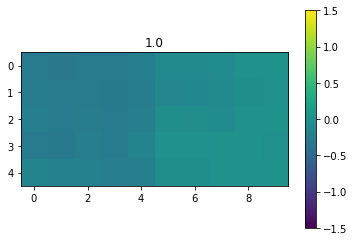

date:180325, rec:003, time:6087.0


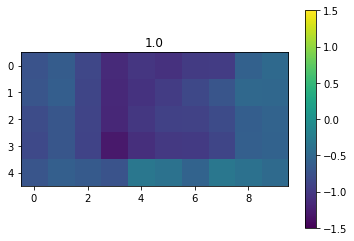

date:180323, rec:002, time:4029.0


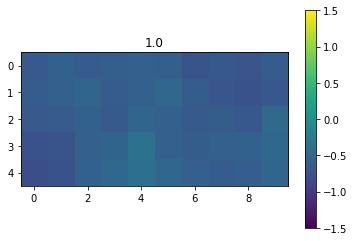

date:180323, rec:002, time:4496.0


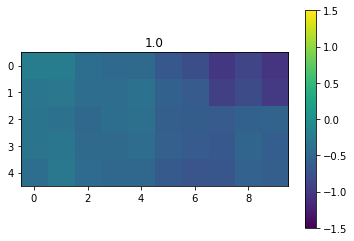

date:180325, rec:001, time:3252.0


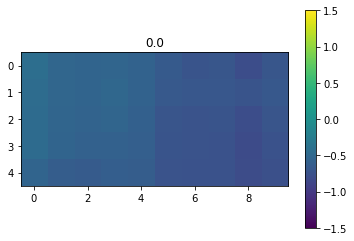

date:180323, rec:004, time:5815.0


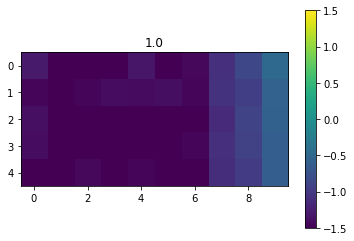

date:180401, rec:001, time:280.0


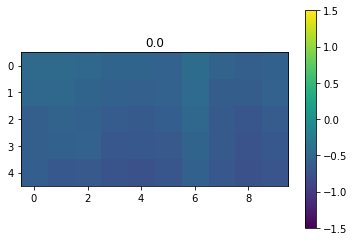

date:180325, rec:005, time:213.0


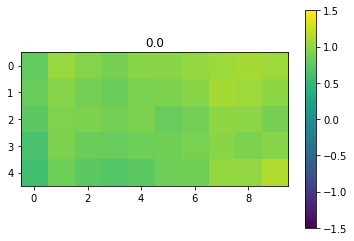

date:180325, rec:006, time:1798.0


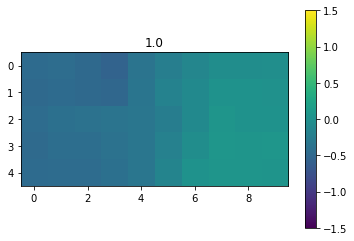

date:180324, rec:006, time:40.0


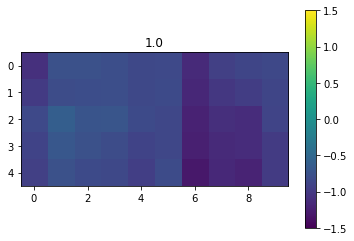

date:180322, rec:002, time:6141.0


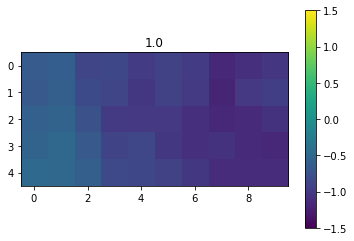

date:180323, rec:005, time:3047.0


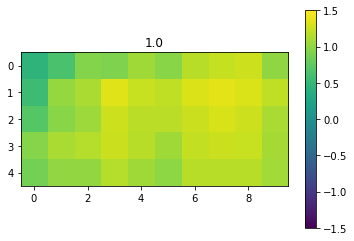

date:180322, rec:004, time:4839.0


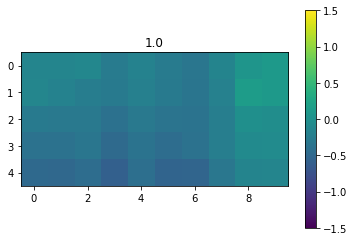

date:180325, rec:001, time:3252.0


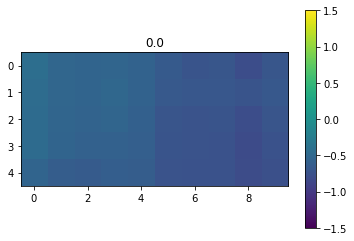

date:180325, rec:002, time:700.0


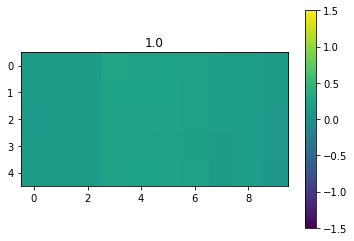

date:180325, rec:009, time:1280.0


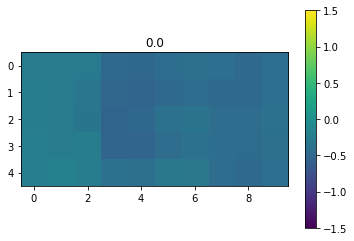

date:180325, rec:003, time:2145.0


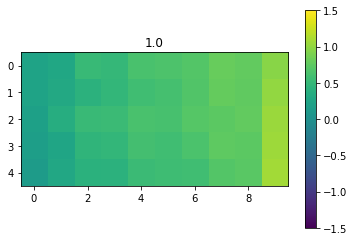

date:180325, rec:007, time:4613.0


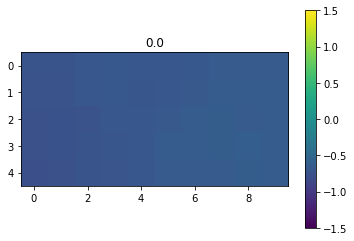

date:180322, rec:003, time:5093.0


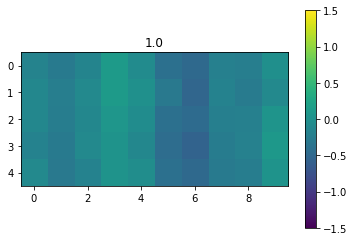

date:180323, rec:001, time:6763.0


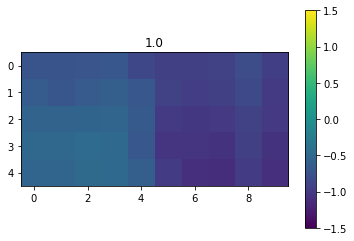

date:180322, rec:007, time:3569.0


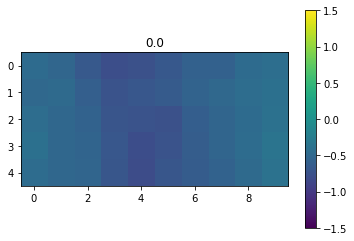

date:180324, rec:004, time:5429.0


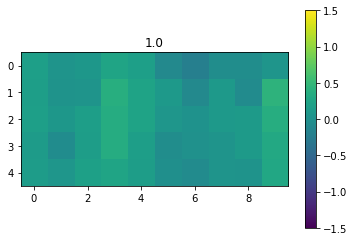

date:180325, rec:009, time:4549.0


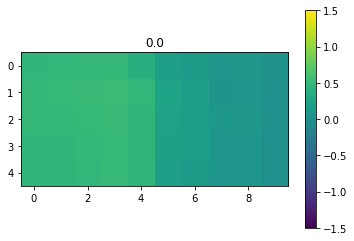

date:180325, rec:009, time:2390.0


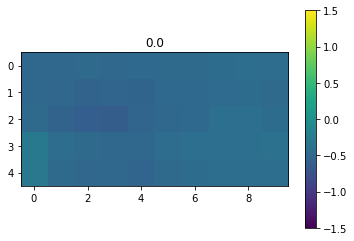

date:180325, rec:001, time:620.0


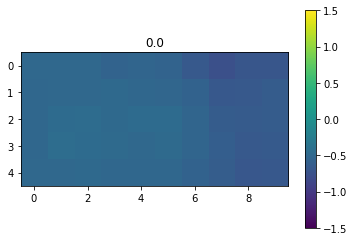

date:180325, rec:004, time:903.0


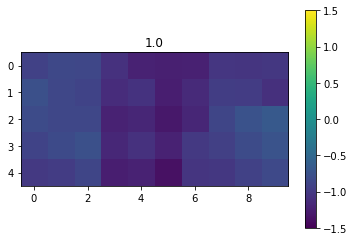

date:180401, rec:001, time:5357.0


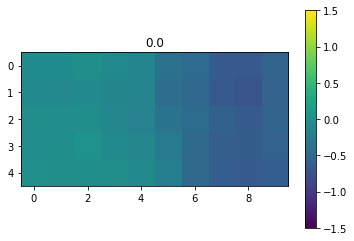

date:180325, rec:002, time:3497.0


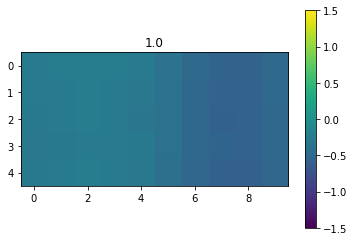

date:180325, rec:009, time:2350.0


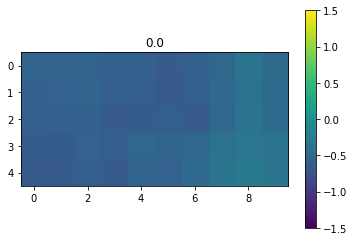

date:180324, rec:001, time:5450.0


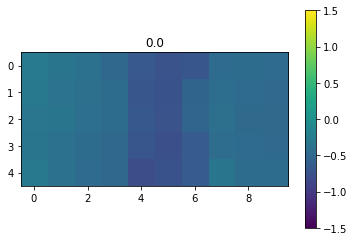

date:180325, rec:003, time:2886.0


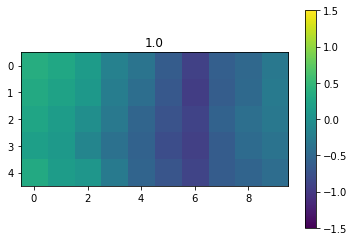

date:180323, rec:003, time:1197.0


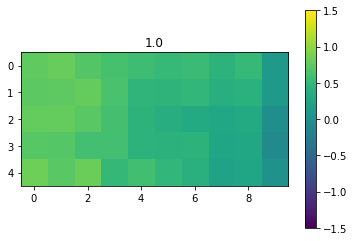

date:180401, rec:001, time:5217.0


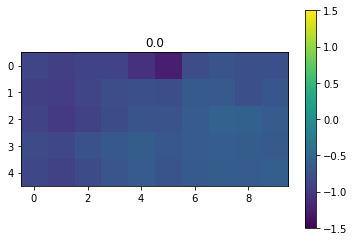

date:180322, rec:003, time:7086.0


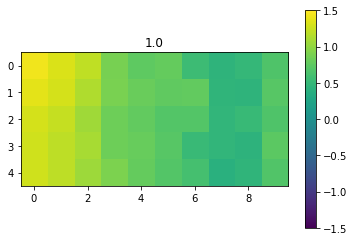

date:180325, rec:007, time:3086.0


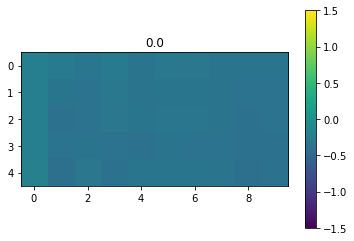

date:180323, rec:005, time:2917.0


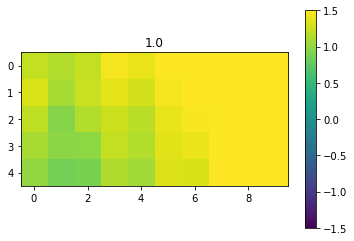

date:180323, rec:004, time:6761.0


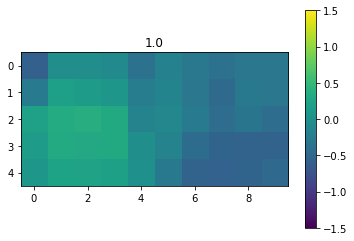

date:180323, rec:003, time:1725.0


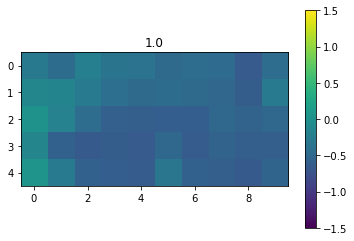

date:180324, rec:001, time:2437.0


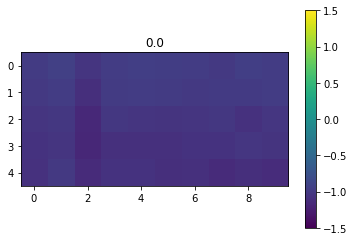

date:180325, rec:007, time:5783.0


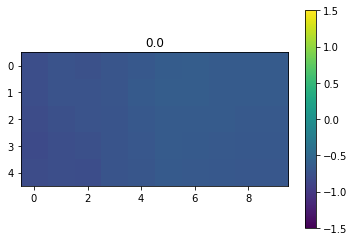

date:180322, rec:004, time:4339.0


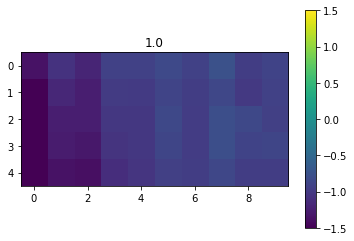

date:180325, rec:005, time:5853.0


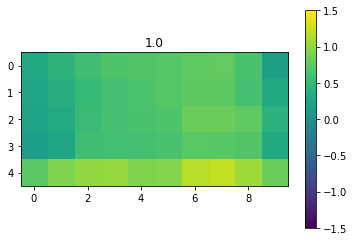

date:180325, rec:001, time:660.0


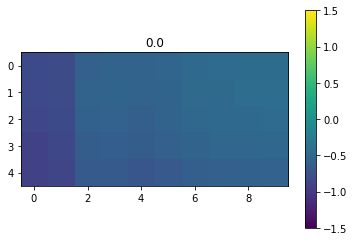

date:180401, rec:001, time:280.0


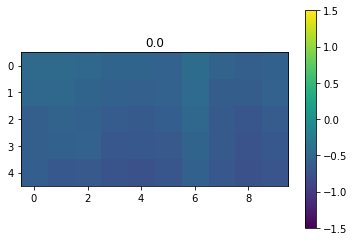

date:180325, rec:002, time:7089.0


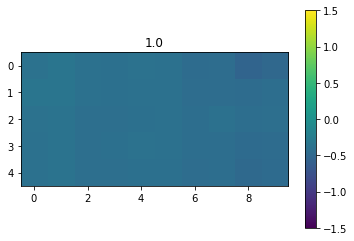

date:180325, rec:006, time:5398.0


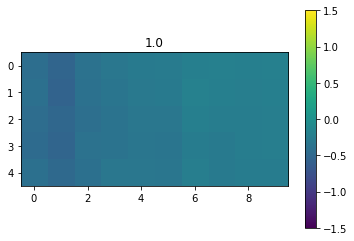

date:180325, rec:004, time:6770.0


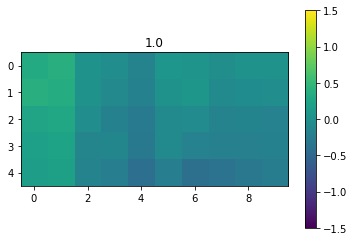

date:180325, rec:003, time:6667.0


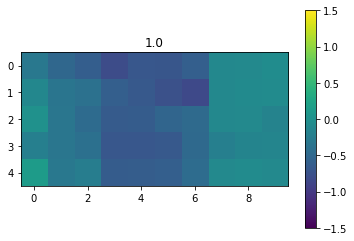

date:180324, rec:004, time:4929.0


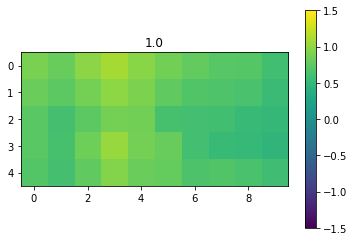

date:180324, rec:008, time:2408.0


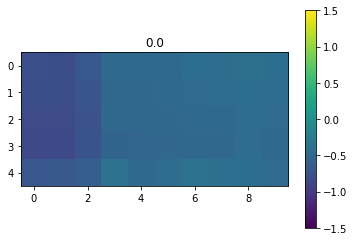

date:180322, rec:004, time:5486.0


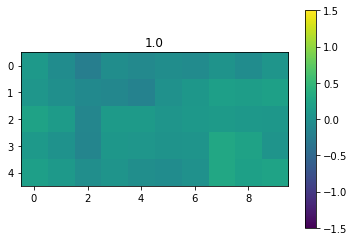

date:180325, rec:001, time:660.0


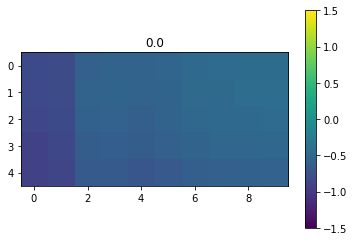

date:180323, rec:003, time:1157.0


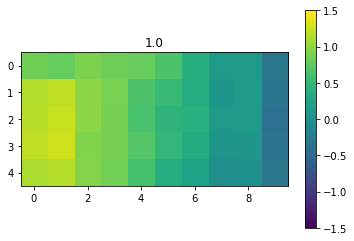

date:180324, rec:009, time:770.0


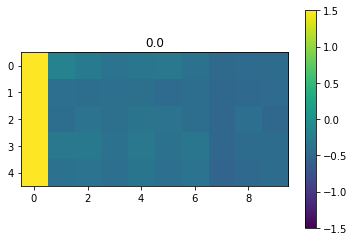

date:180325, rec:004, time:5536.0


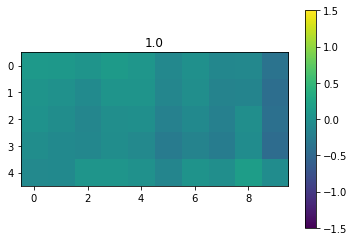

date:180325, rec:007, time:4863.0


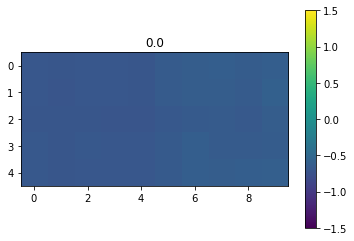

date:180325, rec:005, time:6173.0


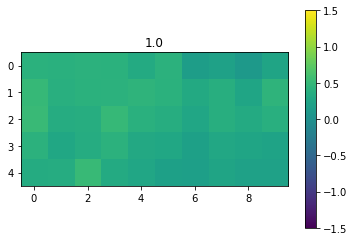

date:180322, rec:007, time:1337.0


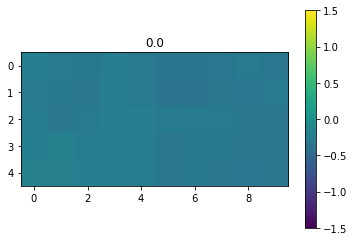

date:180323, rec:007, time:5621.0


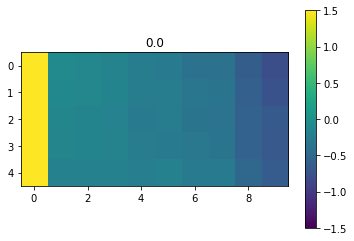

date:180323, rec:007, time:2149.0


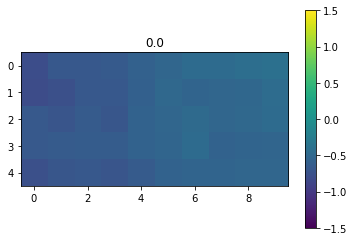

date:180401, rec:001, time:1150.0


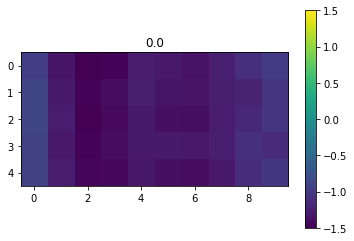

date:180324, rec:006, time:662.0


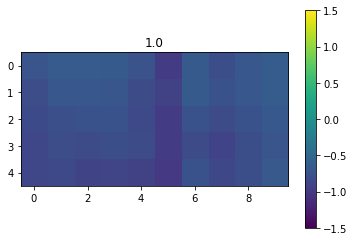

date:180323, rec:007, time:4812.0


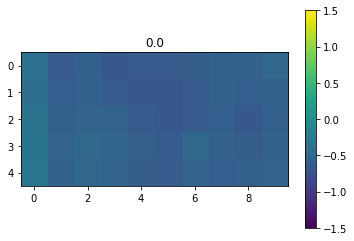

date:180325, rec:001, time:1620.0


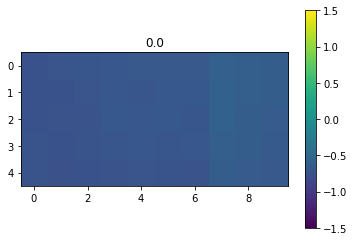

date:180324, rec:005, time:440.0


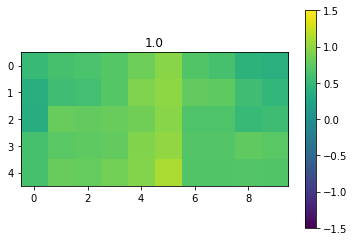

In [16]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader_theta):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization - Theta

In [46]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 'all'
freq = 5

model = GLM(62*5*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [38]:
model_saving_path

'/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models'

In [30]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced_theta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5237171053886414
Val loss for epoch 0: 0.4604865312576294
Train loss for epoch 1: 0.48992928862571716
Val loss for epoch 1: 0.45919355750083923
1
Train loss for epoch 2: 0.4735415577888489
Val loss for epoch 2: 0.5548223257064819
Train loss for epoch 3: 0.4746752977371216
Val loss for epoch 3: 0.5264711976051331
Train loss for epoch 4: 0.4589170813560486
Val loss for epoch 4: 0.4811323881149292
Train loss for epoch 5: 0.4585847556591034
Val loss for epoch 5: 0.4669613242149353
Train loss for epoch 6: 0.44995245337486267
Val loss for epoch 6: 0.6108077764511108
Train loss for epoch 7: 0.44584450125694275
Val loss for epoch 7: 0.5499012470245361
Train loss for epoch 8: 0.4405982494354248
Val loss for epoch 8: 0.5450998544692993
Train loss for epoch 9: 0.43894675374031067
Val loss for epoch 9: 0.5523431897163391
Train loss for epoch 10: 0.4414926767349243
Val loss for epoch 10: 0.5165989995002747
Train loss for epoch 11: 0.44049566984176636
Val loss for epoch 11:

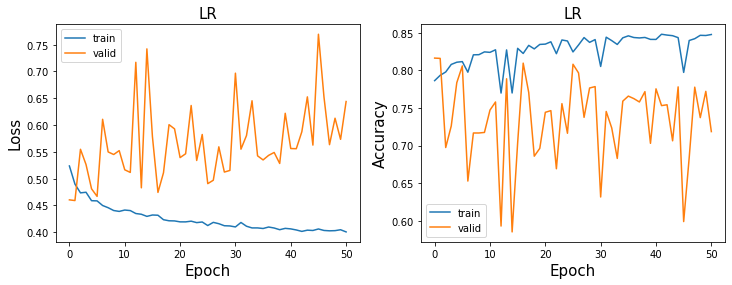

In [31]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [36]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_theta' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0          1


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGnone0_EPOCH1_valbalanced_theta.pt


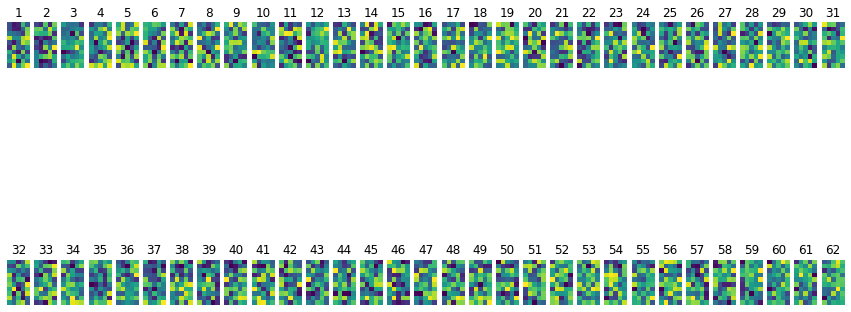

validation loss:0.45919355750083923 accuracy:0.8158871566443949
0.5
test loss:0.5208283066749573 accuracy:0.7950072011521844
0.7385182


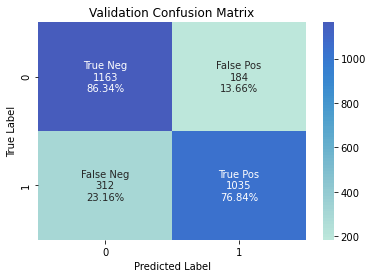

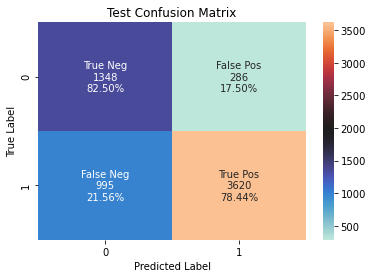

date:180327, rec:006, time:5048.0, label:1.0
Original data 62 CH


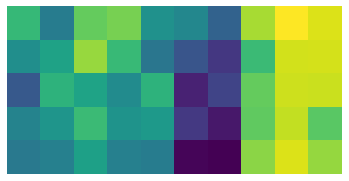

In [47]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*10*5).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced_theta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced_theta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 10, 5)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with L2 regularization - theta

In [6]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'
freq = 5


Train loss for epoch 0: 0.5320508480072021
Val loss for epoch 0: 0.46232178807258606
Train loss for epoch 1: 0.4946317970752716
Val loss for epoch 1: 0.4430597722530365
1
Train loss for epoch 2: 0.4911400377750397
Val loss for epoch 2: 0.4624409079551697
Train loss for epoch 3: 0.4776611626148224
Val loss for epoch 3: 0.46476083993911743
Train loss for epoch 4: 0.46680089831352234
Val loss for epoch 4: 0.44365596771240234
Train loss for epoch 5: 0.46547943353652954
Val loss for epoch 5: 0.47152021527290344
Train loss for epoch 6: 0.45698413252830505
Val loss for epoch 6: 0.4747772216796875
Train loss for epoch 7: 0.4524418115615845
Val loss for epoch 7: 0.4931783974170685
Train loss for epoch 8: 0.45087695121765137
Val loss for epoch 8: 0.5916955471038818
Train loss for epoch 9: 0.45283541083335876
Val loss for epoch 9: 0.5017803907394409
Train loss for epoch 10: 0.4448194205760956
Val loss for epoch 10: 0.4557258188724518
Train loss for epoch 11: 0.4445591866970062
Val loss for epoch 

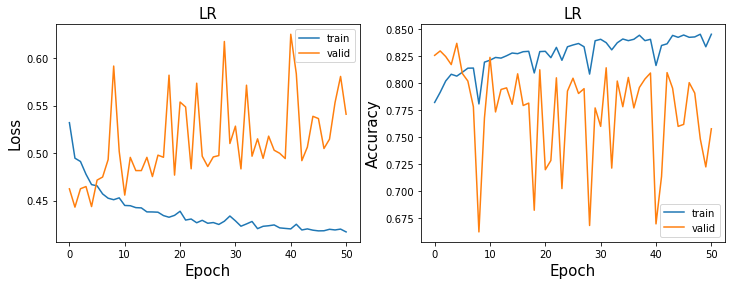

Train loss for epoch 0: 0.6406835317611694
Val loss for epoch 0: 0.5281026363372803
Train loss for epoch 1: 0.5677834153175354
Val loss for epoch 1: 0.5112024545669556
1
Train loss for epoch 2: 0.54937344789505
Val loss for epoch 2: 0.5053466558456421
2
Train loss for epoch 3: 0.5413068532943726
Val loss for epoch 3: 0.48513472080230713
3
Train loss for epoch 4: 0.5417238473892212
Val loss for epoch 4: 0.4810985028743744
4
Train loss for epoch 5: 0.5381646752357483
Val loss for epoch 5: 0.4838581383228302
Train loss for epoch 6: 0.5442930459976196
Val loss for epoch 6: 0.4860038757324219
Train loss for epoch 7: 0.5402007102966309
Val loss for epoch 7: 0.4785918593406677
7
Train loss for epoch 8: 0.5343329906463623
Val loss for epoch 8: 0.4848440885543823
Train loss for epoch 9: 0.5402022004127502
Val loss for epoch 9: 0.47873058915138245
Train loss for epoch 10: 0.5367913246154785
Val loss for epoch 10: 0.4840146601200104
Train loss for epoch 11: 0.5415841341018677
Val loss for epoch 1

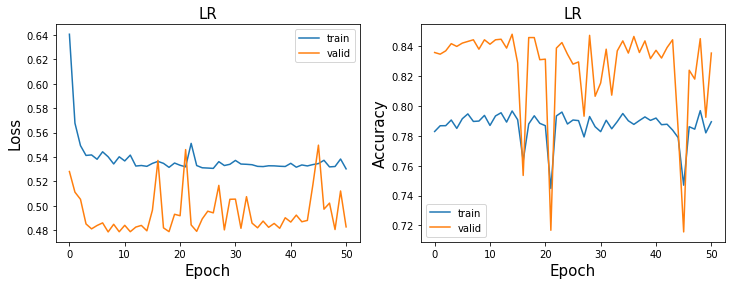

Train loss for epoch 0: 0.7172043323516846
Val loss for epoch 0: 0.5618947148323059
Train loss for epoch 1: 0.576234757900238
Val loss for epoch 1: 0.5047292709350586
1
Train loss for epoch 2: 0.5738050937652588
Val loss for epoch 2: 0.5041775107383728
2
Train loss for epoch 3: 0.5683469772338867
Val loss for epoch 3: 0.5227136611938477
Train loss for epoch 4: 0.5637527108192444
Val loss for epoch 4: 0.5071537494659424
Train loss for epoch 5: 0.5612255334854126
Val loss for epoch 5: 0.5038003325462341
5
Train loss for epoch 6: 0.5609562397003174
Val loss for epoch 6: 0.5063582062721252
Train loss for epoch 7: 0.5611431002616882
Val loss for epoch 7: 0.543149471282959
Train loss for epoch 8: 0.5627689361572266
Val loss for epoch 8: 0.5094630718231201
Train loss for epoch 9: 0.5634117722511292
Val loss for epoch 9: 0.4950813055038452
9
Train loss for epoch 10: 0.5596945881843567
Val loss for epoch 10: 0.5113726258277893
Train loss for epoch 11: 0.557843029499054
Val loss for epoch 11: 0.

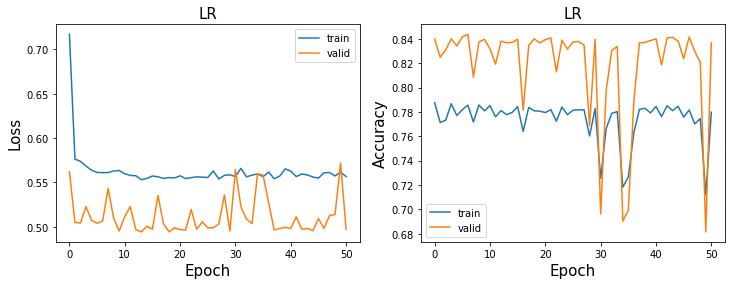

In [7]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    
    model = GLM(62*5*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, freq = freq)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, freq = freq)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [8]:
path = model_saving_path
model_LR = os.listdir(path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_theta' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          1
50         7
100       13


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl21_EPOCH1_REDUCEsum_valbalanced_theta.pt


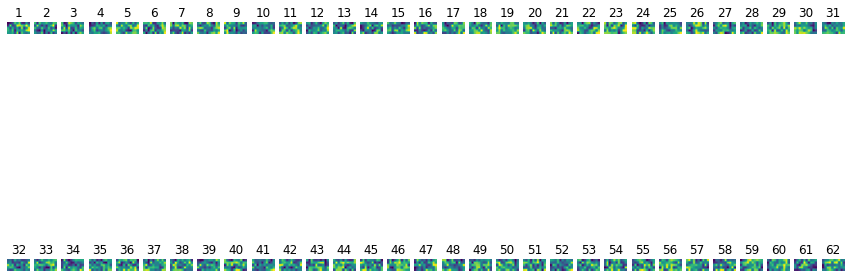

validation loss:0.4430597722530365 accuracy:0.8296213808463252
0.5
test loss:0.534339189529419 accuracy:0.795167226756281
0.7385182


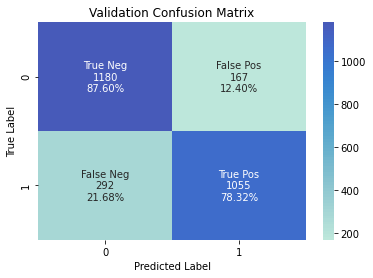

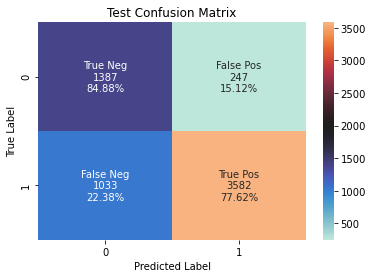

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


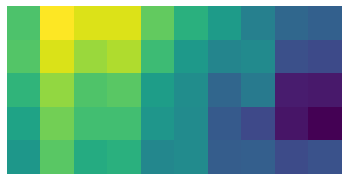

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl250_EPOCH7_REDUCEsum_valbalanced_theta.pt


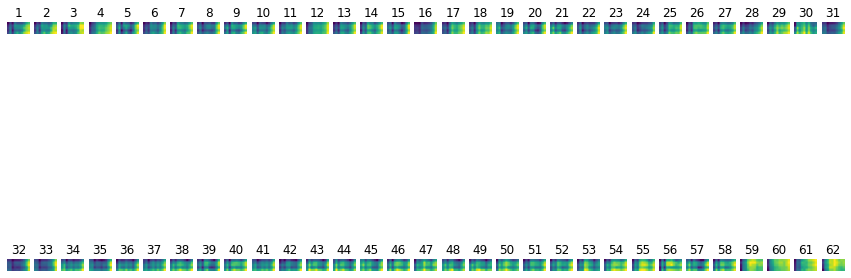

validation loss:0.4785918593406677 accuracy:0.8444691907943578
0.5
test loss:0.527582049369812 accuracy:0.8105296847495599
0.7385182


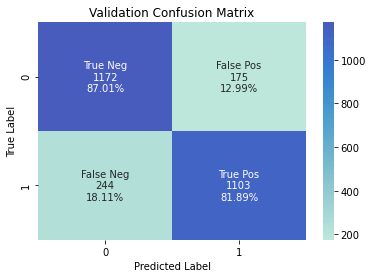

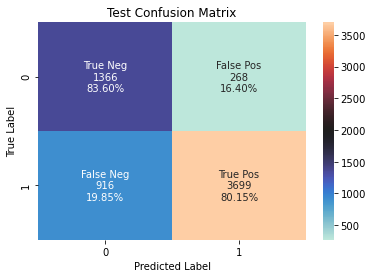

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


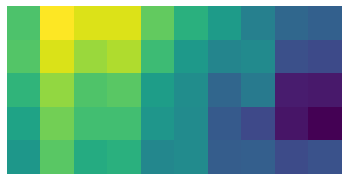

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl2100_EPOCH13_REDUCEsum_valbalanced_theta.pt


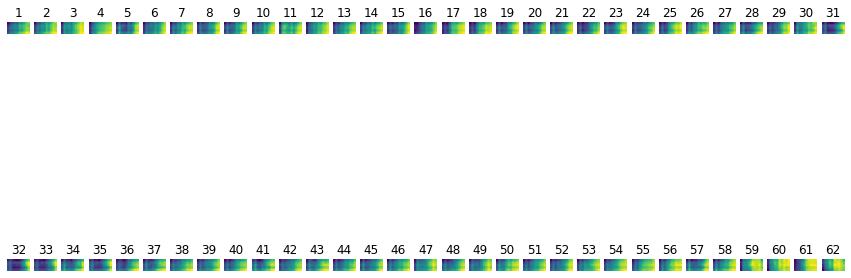

validation loss:0.4940785765647888 accuracy:0.8366740905716407
0.5
test loss:0.5428265929222107 accuracy:0.7982077132341174
0.7385182


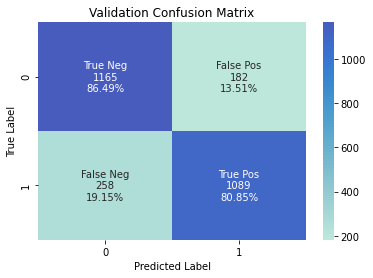

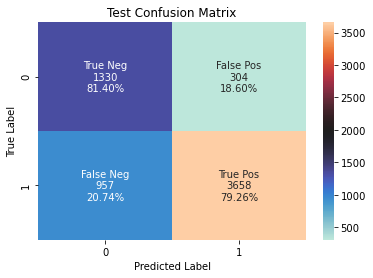

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


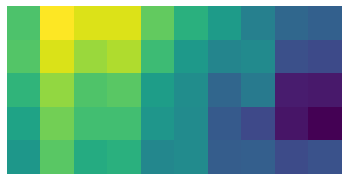

In [11]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    load_path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*5*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 5, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization-theta

In [16]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'
freq = 5



Train loss for epoch 0: 0.5480122566223145
Val loss for epoch 0: 0.4498833417892456
Train loss for epoch 1: 0.5009185671806335
Val loss for epoch 1: 0.4696008861064911
Train loss for epoch 2: 0.4857945144176483
Val loss for epoch 2: 0.44172585010528564
2
Train loss for epoch 3: 0.4767722487449646
Val loss for epoch 3: 0.4792805016040802
Train loss for epoch 4: 0.4712424576282501
Val loss for epoch 4: 0.4586319625377655
Train loss for epoch 5: 0.464738130569458
Val loss for epoch 5: 0.46471789479255676
Train loss for epoch 6: 0.45833709836006165
Val loss for epoch 6: 0.4615868330001831
Train loss for epoch 7: 0.45478591322898865
Val loss for epoch 7: 0.6006755828857422
Train loss for epoch 8: 0.4560309648513794
Val loss for epoch 8: 0.46439749002456665
Train loss for epoch 9: 0.4490320384502411
Val loss for epoch 9: 0.5445655584335327
Train loss for epoch 10: 0.4519137740135193
Val loss for epoch 10: 0.46391695737838745
Train loss for epoch 11: 0.4425760507583618
Val loss for epoch 11: 

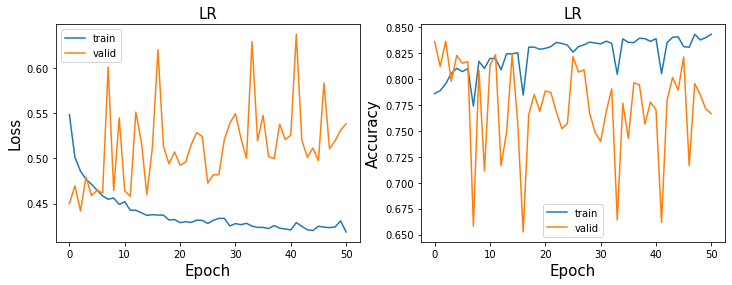

Train loss for epoch 0: 0.6149305701255798
Val loss for epoch 0: 0.46511104702949524
Train loss for epoch 1: 0.4971804916858673
Val loss for epoch 1: 0.4914470613002777
Train loss for epoch 2: 0.49114230275154114
Val loss for epoch 2: 0.46660271286964417
Train loss for epoch 3: 0.48414182662963867
Val loss for epoch 3: 0.4904642105102539
Train loss for epoch 4: 0.47864171862602234
Val loss for epoch 4: 0.4519871473312378
4
Train loss for epoch 5: 0.4747159481048584
Val loss for epoch 5: 0.44744154810905457
5
Train loss for epoch 6: 0.47327202558517456
Val loss for epoch 6: 0.45814481377601624
Train loss for epoch 7: 0.46962499618530273
Val loss for epoch 7: 0.48817160725593567
Train loss for epoch 8: 0.4651433527469635
Val loss for epoch 8: 0.46859830617904663
Train loss for epoch 9: 0.47071129083633423
Val loss for epoch 9: 0.46830183267593384
Train loss for epoch 10: 0.4708220958709717
Val loss for epoch 10: 0.5099133849143982
Train loss for epoch 11: 0.46420788764953613
Val loss for

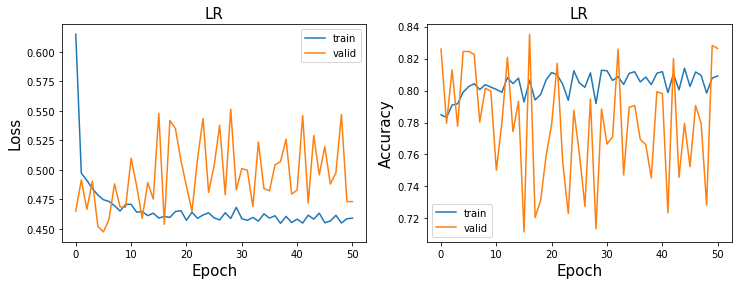

Train loss for epoch 0: 0.7226418256759644
Val loss for epoch 0: 0.4857073128223419
Train loss for epoch 1: 0.5043776035308838
Val loss for epoch 1: 0.45011982321739197
1
Train loss for epoch 2: 0.4981006681919098
Val loss for epoch 2: 0.4896751940250397
Train loss for epoch 3: 0.4899337589740753
Val loss for epoch 3: 0.5095779895782471
Train loss for epoch 4: 0.48727571964263916
Val loss for epoch 4: 0.4930969774723053
Train loss for epoch 5: 0.48208749294281006
Val loss for epoch 5: 0.5028119087219238
Train loss for epoch 6: 0.4790576994419098
Val loss for epoch 6: 0.48375868797302246
Train loss for epoch 7: 0.47613367438316345
Val loss for epoch 7: 0.5011760592460632
Train loss for epoch 8: 0.47387412190437317
Val loss for epoch 8: 0.47615334391593933
Train loss for epoch 9: 0.47206172347068787
Val loss for epoch 9: 0.49381643533706665
Train loss for epoch 10: 0.46804192662239075
Val loss for epoch 10: 0.4862656593322754
Train loss for epoch 11: 0.47427862882614136
Val loss for epoc

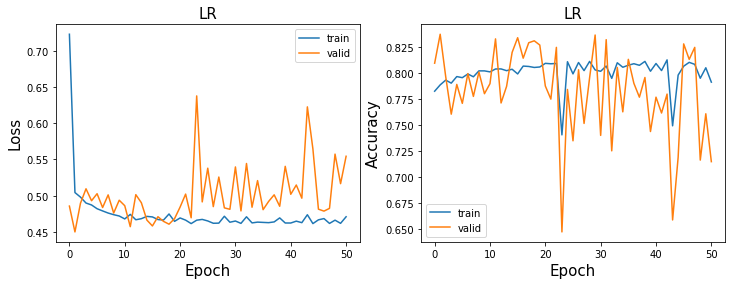

In [17]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(62*5*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, freq =freq)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device, freq =freq)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if epoch == 0:
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [18]:

model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_theta' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          2
50        11
100        1


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff1_EPOCH2_REDUCEsum_valbalanced_theta.pt


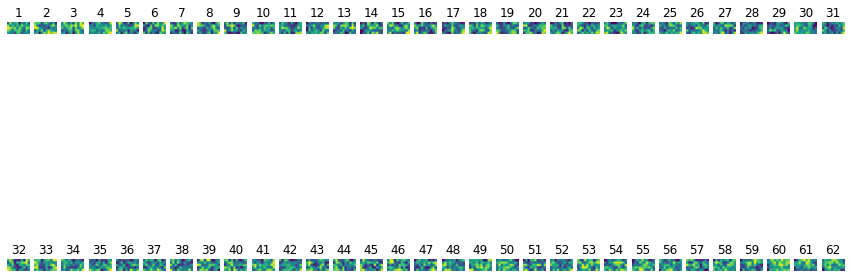

validation loss:0.44172585010528564 accuracy:0.8363028953229399
0.5
test loss:0.5289387702941895 accuracy:0.7967674827972475
0.7385182


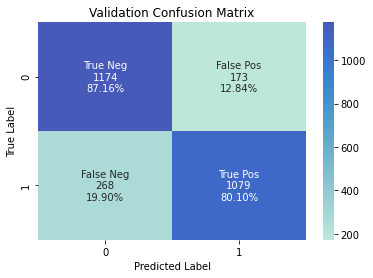

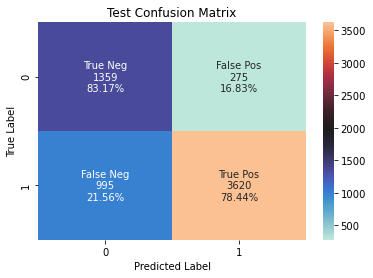

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


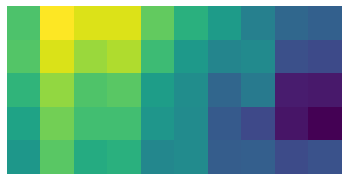

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff50_EPOCH11_REDUCEsum_valbalanced_theta.pt


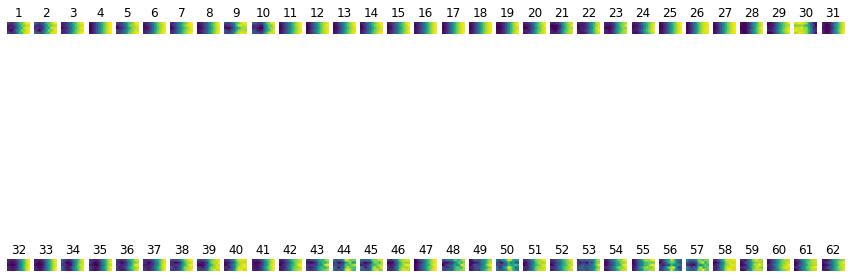

validation loss:0.4471537172794342 accuracy:0.8325909428359317
0.5
test loss:0.5626336336135864 accuracy:0.7945271243398944
0.7385182


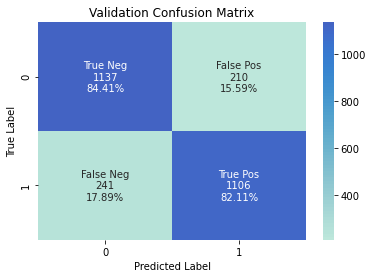

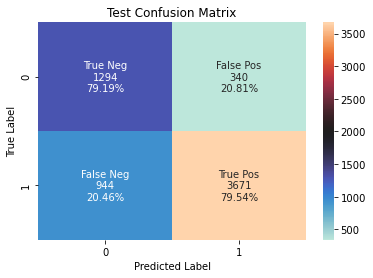

date:180327, rec:006, time:5318.0, label:1.0
Original data 62 CH


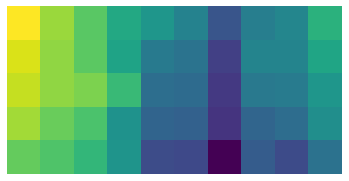

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff100_EPOCH1_REDUCEsum_valbalanced_theta.pt


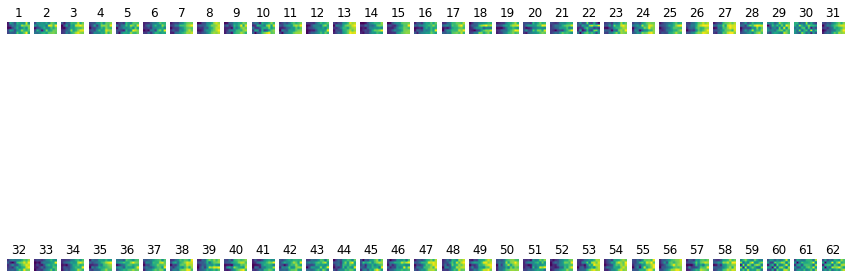

validation loss:0.45011982321739197 accuracy:0.8370452858203415
0.5
test loss:0.5303657650947571 accuracy:0.7962874059849576
0.7385182


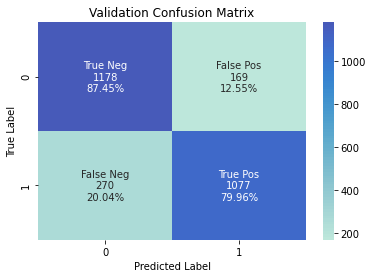

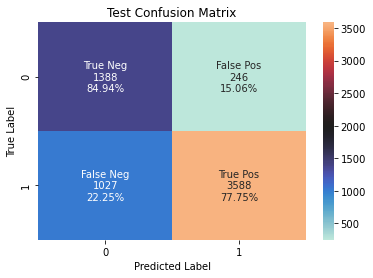

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


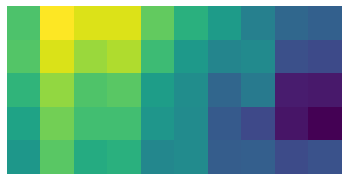

In [19]:
load_path = model_saving_path
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*5*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_theta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 5, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, freq =freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_theta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device, freq =freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with no regularization - Beta

In [20]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 'all'
freq = 16

model = GLM(62*freq*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [21]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced_beta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5717867612838745
Val loss for epoch 0: 0.4316394031047821
Train loss for epoch 1: 0.4637210965156555
Val loss for epoch 1: 0.4249526858329773
1
Train loss for epoch 2: 0.44792360067367554
Val loss for epoch 2: 0.6629811525344849
Train loss for epoch 3: 0.442748486995697
Val loss for epoch 3: 0.5135548114776611
Train loss for epoch 4: 0.43122389912605286
Val loss for epoch 4: 0.495583176612854
Train loss for epoch 5: 0.4326959252357483
Val loss for epoch 5: 0.45350128412246704
Train loss for epoch 6: 0.43755775690078735
Val loss for epoch 6: 0.5916309952735901
Train loss for epoch 7: 0.4102761149406433
Val loss for epoch 7: 0.4670300781726837
Train loss for epoch 8: 0.4084828495979309
Val loss for epoch 8: 0.4302895665168762
Train loss for epoch 9: 0.4228484034538269
Val loss for epoch 9: 0.6947317719459534
Train loss for epoch 10: 0.4043167531490326
Val loss for epoch 10: 0.4145156443119049
10
Train loss for epoch 11: 0.39572468400001526
Val loss for epoch 11:

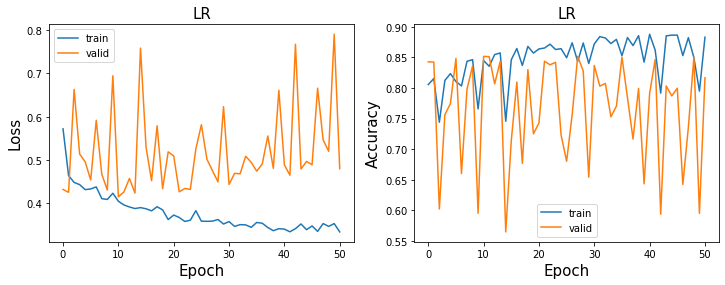

In [22]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [23]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_beta' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0         10


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGnone0_EPOCH10_valbalanced_beta.pt


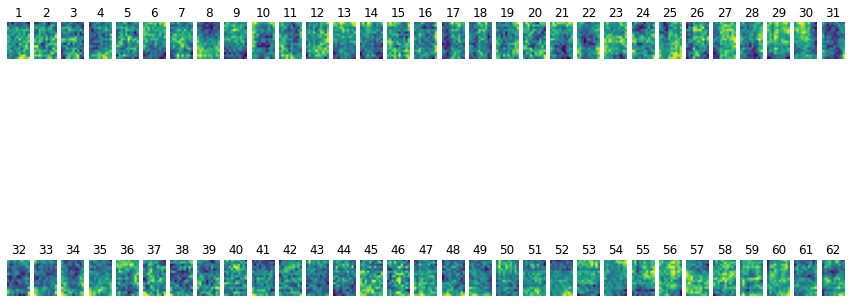

validation loss:0.4145156443119049 accuracy:0.8515219005196734
0.5
test loss:0.4838925898075104 accuracy:0.8444551128180509
0.7385182


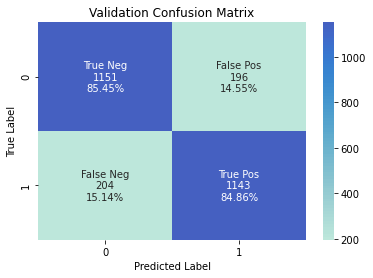

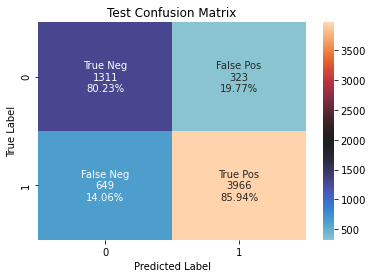

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


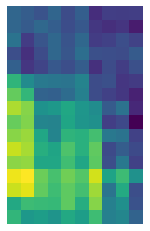

In [25]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*freq*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced_beta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_valbalanced_beta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, freq, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with L2 regularization - beta

In [26]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'
freq = 16



Train loss for epoch 0: 0.5689696073532104
Val loss for epoch 0: 0.43226975202560425
Train loss for epoch 1: 0.4620805084705353
Val loss for epoch 1: 0.43730250000953674
Train loss for epoch 2: 0.44657689332962036
Val loss for epoch 2: 0.6222625970840454
Train loss for epoch 3: 0.4441230297088623
Val loss for epoch 3: 0.43077921867370605
3
Train loss for epoch 4: 0.46968144178390503
Val loss for epoch 4: 0.5153292417526245
Train loss for epoch 5: 0.42987892031669617
Val loss for epoch 5: 0.5779905915260315
Train loss for epoch 6: 0.418186753988266
Val loss for epoch 6: 0.4784865081310272
Train loss for epoch 7: 0.41209274530410767
Val loss for epoch 7: 0.43154847621917725
Train loss for epoch 8: 0.41270211338996887
Val loss for epoch 8: 0.4186622202396393
8
Train loss for epoch 9: 0.40731170773506165
Val loss for epoch 9: 0.4175906777381897
9
Train loss for epoch 10: 0.41064566373825073
Val loss for epoch 10: 0.9495909810066223
Train loss for epoch 11: 0.4037267565727234
Val loss for e

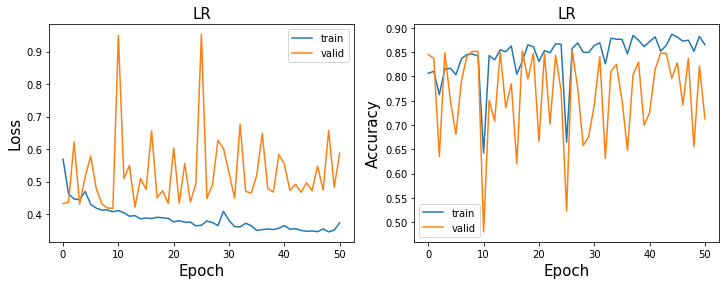

Train loss for epoch 0: 0.6671468019485474
Val loss for epoch 0: 0.5673646926879883
Train loss for epoch 1: 0.5448534488677979
Val loss for epoch 1: 0.48994356393814087
1
Train loss for epoch 2: 0.523820698261261
Val loss for epoch 2: 0.5352522134780884
Train loss for epoch 3: 0.514668345451355
Val loss for epoch 3: 0.473766028881073
3
Train loss for epoch 4: 0.5156029462814331
Val loss for epoch 4: 0.5589882731437683
Train loss for epoch 5: 0.5107783675193787
Val loss for epoch 5: 0.46393853425979614
5
Train loss for epoch 6: 0.5203633308410645
Val loss for epoch 6: 0.47605058550834656
Train loss for epoch 7: 0.5075222253799438
Val loss for epoch 7: 0.4597119987010956
7
Train loss for epoch 8: 0.5061360597610474
Val loss for epoch 8: 0.9325845837593079
Train loss for epoch 9: 0.5110505223274231
Val loss for epoch 9: 0.5432941317558289
Train loss for epoch 10: 0.5262653231620789
Val loss for epoch 10: 0.7312981486320496
Train loss for epoch 11: 0.5144557356834412
Val loss for epoch 11:

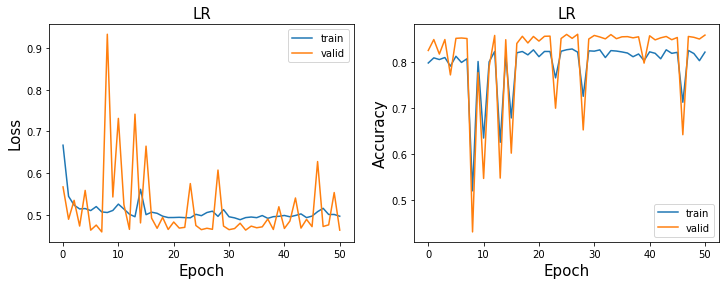

Train loss for epoch 0: 0.7800207734107971
Val loss for epoch 0: 0.6276562213897705
Train loss for epoch 1: 0.5728546380996704
Val loss for epoch 1: 0.4951930642127991
1
Train loss for epoch 2: 0.5434618592262268
Val loss for epoch 2: 0.4982523024082184
Train loss for epoch 3: 0.5387305021286011
Val loss for epoch 3: 0.48399898409843445
3
Train loss for epoch 4: 0.5470064878463745
Val loss for epoch 4: 0.5125877857208252
Train loss for epoch 5: 0.5526193380355835
Val loss for epoch 5: 0.48261427879333496
5
Train loss for epoch 6: 0.5263497233390808
Val loss for epoch 6: 0.542343020439148
Train loss for epoch 7: 0.534348726272583
Val loss for epoch 7: 0.5266395211219788
Train loss for epoch 8: 0.5278276801109314
Val loss for epoch 8: 0.4764202833175659
8
Train loss for epoch 9: 0.5279146432876587
Val loss for epoch 9: 0.47390180826187134
9
Train loss for epoch 10: 0.5270758867263794
Val loss for epoch 10: 0.4799848794937134
Train loss for epoch 11: 0.529981791973114
Val loss for epoch 1

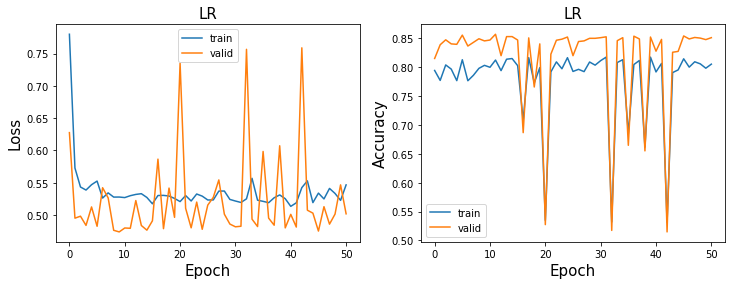

In [27]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    
    model = GLM(62*16*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_beta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [28]:
path = model_saving_path
model_LR = os.listdir(path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_beta' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          9
50         7
100        9


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl21_EPOCH9_REDUCEsum_valbalanced_beta.pt


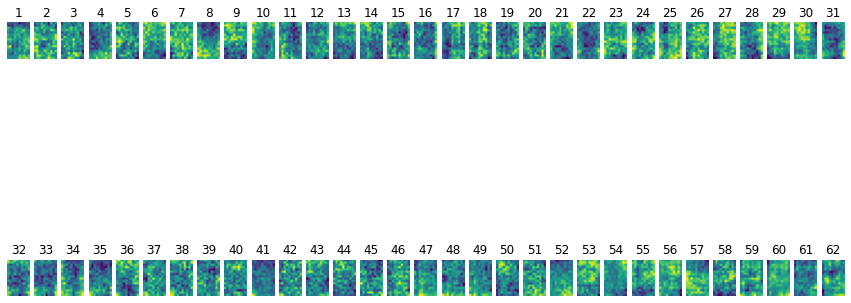

validation loss:0.4175906777381897 accuracy:0.8511507052709726
0.5
test loss:0.4975546598434448 accuracy:0.8450952152344375
0.7385182


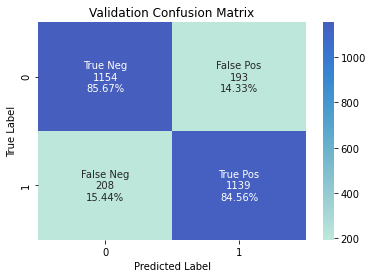

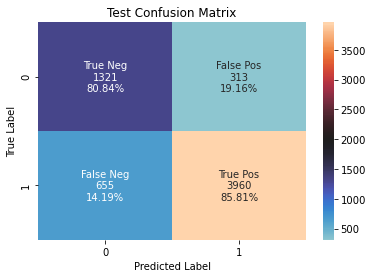

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


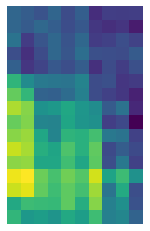

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl250_EPOCH7_REDUCEsum_valbalanced_beta.pt


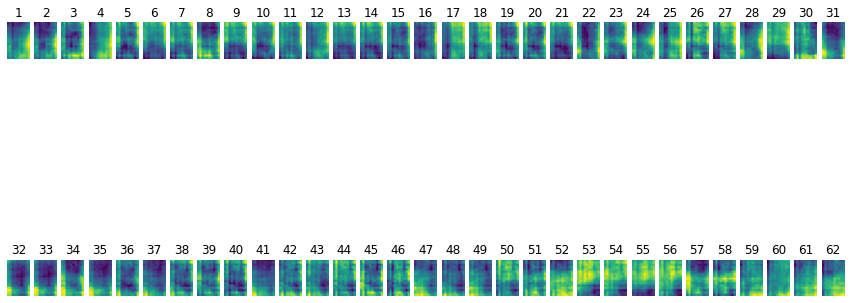

validation loss:0.4597119987010956 accuracy:0.8507795100222717
0.5
test loss:0.4918452203273773 accuracy:0.8505360857737237
0.7385182


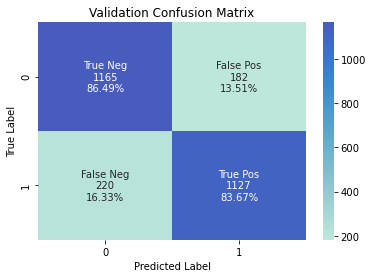

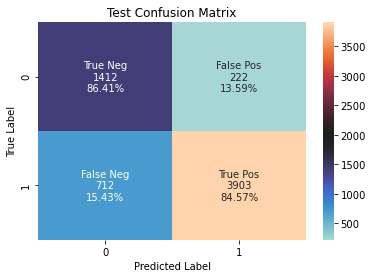

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


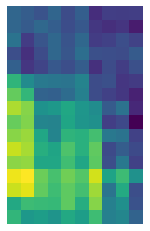

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl2100_EPOCH9_REDUCEsum_valbalanced_beta.pt


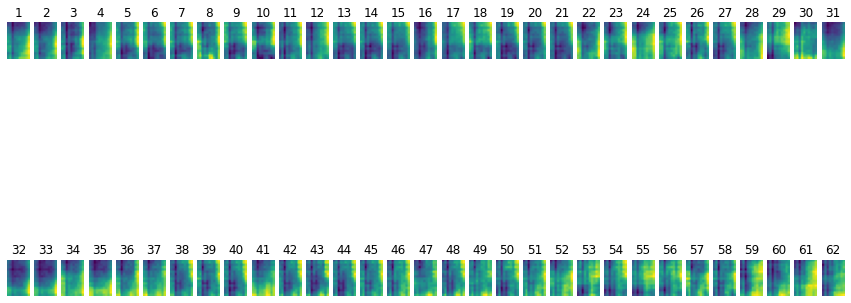

validation loss:0.47390180826187134 accuracy:0.8455827765404603
0.5
test loss:0.4963322877883911 accuracy:0.8378940630500881
0.7385182


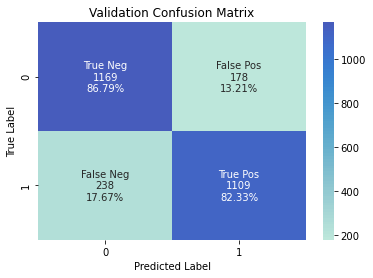

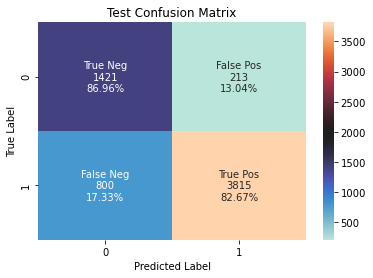

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


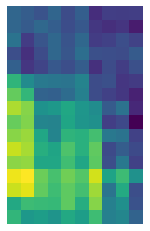

In [30]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    load_path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*16*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_beta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_beta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, freq, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization-beta

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'
freq = 16



Train loss for epoch 0: 0.5655621886253357
Val loss for epoch 0: 0.4353639781475067
Train loss for epoch 1: 0.4675590991973877
Val loss for epoch 1: 0.43362516164779663
1
Train loss for epoch 2: 0.4495347738265991
Val loss for epoch 2: 0.45680809020996094
Train loss for epoch 3: 0.44725608825683594
Val loss for epoch 3: 0.5604391098022461
Train loss for epoch 4: 0.43841472268104553
Val loss for epoch 4: 0.42357632517814636
4
Train loss for epoch 5: 0.42197227478027344
Val loss for epoch 5: 0.5633858442306519
Train loss for epoch 6: 0.4187437891960144
Val loss for epoch 6: 0.43408018350601196
Train loss for epoch 7: 0.4319060146808624
Val loss for epoch 7: 0.4645611047744751
Train loss for epoch 8: 0.4233739674091339
Val loss for epoch 8: 0.4364050030708313
Train loss for epoch 9: 0.40447500348091125
Val loss for epoch 9: 0.41835618019104004
9
Train loss for epoch 10: 0.41263923048973083
Val loss for epoch 10: 0.654164731502533
Train loss for epoch 11: 0.4042211174964905
Val loss for ep

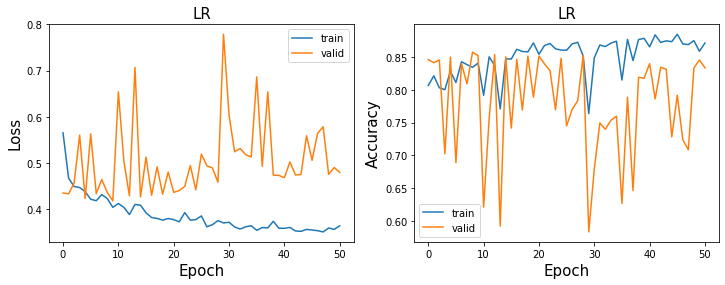

Train loss for epoch 0: 0.7025263905525208
Val loss for epoch 0: 0.46636396646499634
Train loss for epoch 1: 0.4837762117385864
Val loss for epoch 1: 0.45821866393089294
1
Train loss for epoch 2: 0.4605564773082733
Val loss for epoch 2: 0.4268416464328766
2
Train loss for epoch 3: 0.4581061601638794
Val loss for epoch 3: 0.4384678304195404
Train loss for epoch 4: 0.46736231446266174
Val loss for epoch 4: 0.4305431842803955
Train loss for epoch 5: 0.4512973427772522
Val loss for epoch 5: 0.43951013684272766
Train loss for epoch 6: 0.44588711857795715
Val loss for epoch 6: 0.42696407437324524
Train loss for epoch 7: 0.47017741203308105
Val loss for epoch 7: 0.43364840745925903
Train loss for epoch 8: 0.43730247020721436
Val loss for epoch 8: 0.5303674936294556
Train loss for epoch 9: 0.44048449397087097
Val loss for epoch 9: 1.1480897665023804
Train loss for epoch 10: 0.45591244101524353
Val loss for epoch 10: 0.4269023835659027
Train loss for epoch 11: 0.4487459659576416
Val loss for ep

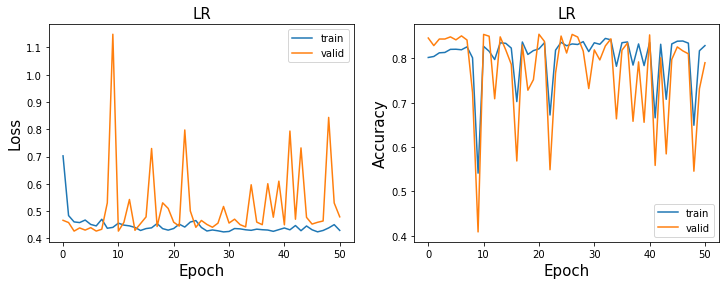

Train loss for epoch 0: 0.8333570957183838
Val loss for epoch 0: 0.48087888956069946
Train loss for epoch 1: 0.4950180947780609
Val loss for epoch 1: 0.4419330060482025
1
Train loss for epoch 2: 0.5025721788406372
Val loss for epoch 2: 0.5016482472419739
Train loss for epoch 3: 0.4626695215702057
Val loss for epoch 3: 0.4291165769100189
3
Train loss for epoch 4: 0.4672989249229431
Val loss for epoch 4: 0.4842011630535126
Train loss for epoch 5: 0.4551577866077423
Val loss for epoch 5: 0.4417317509651184
Train loss for epoch 6: 0.4585055410861969
Val loss for epoch 6: 0.42526134848594666
6
Train loss for epoch 7: 0.4524618983268738
Val loss for epoch 7: 0.7620843648910522
Train loss for epoch 8: 0.4543171525001526
Val loss for epoch 8: 0.4542129635810852
Train loss for epoch 9: 0.44650816917419434
Val loss for epoch 9: 0.4261913299560547
Train loss for epoch 10: 0.4489094614982605
Val loss for epoch 10: 0.42982834577560425
Train loss for epoch 11: 0.4405953884124756
Val loss for epoch 1

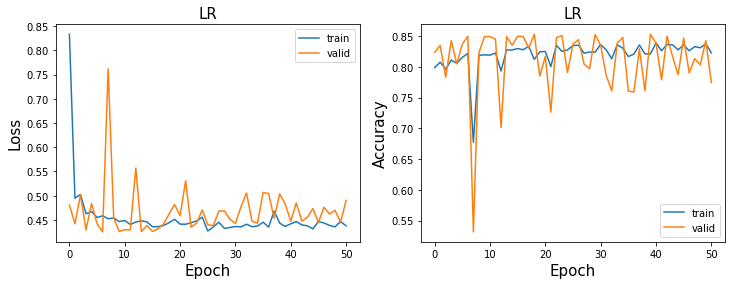

In [32]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(62*16*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_beta.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [33]:

model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_beta' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          9
50         2
100        6


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff1_EPOCH9_REDUCEsum_valbalanced_beta.pt


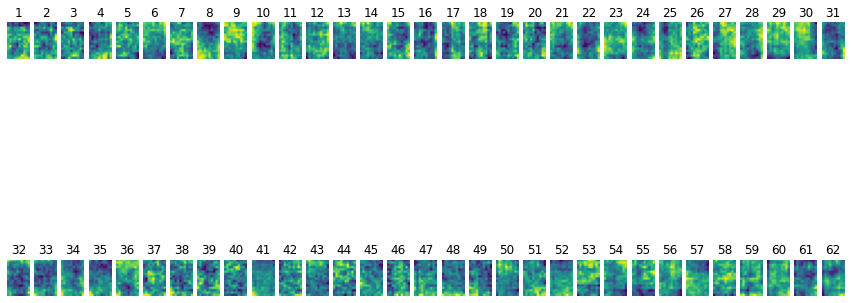

validation loss:0.41835618019104004 accuracy:0.852264291017075
0.5
test loss:0.4797508716583252 accuracy:0.8446151384221475
0.7385182


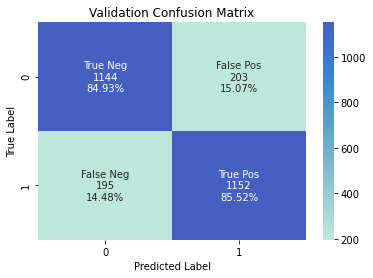

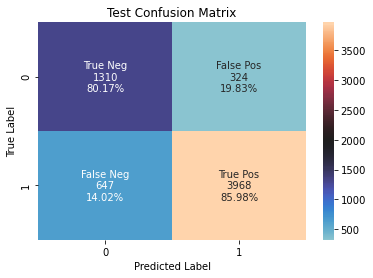

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


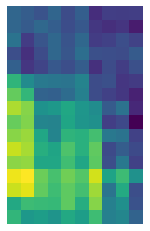

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff50_EPOCH2_REDUCEsum_valbalanced_beta.pt


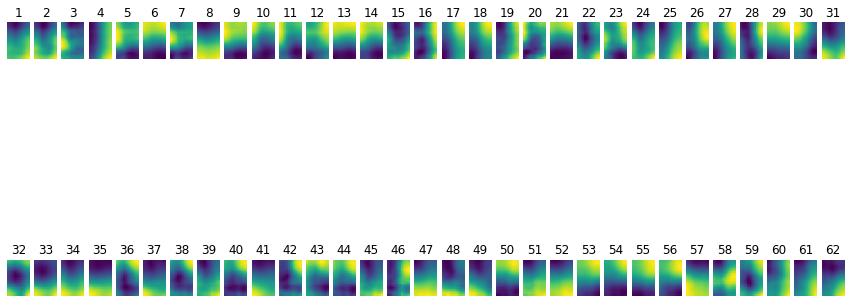

validation loss:0.4268416464328766 accuracy:0.8437268002969562
0.5
test loss:0.5029116272926331 accuracy:0.8414146263402145
0.7385182


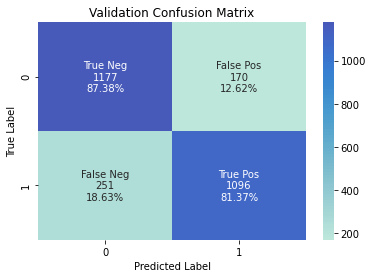

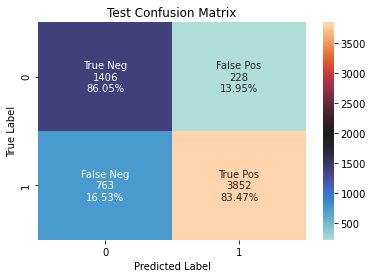

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


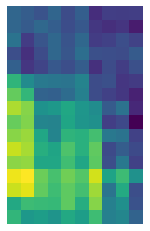

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff100_EPOCH6_REDUCEsum_valbalanced_beta.pt


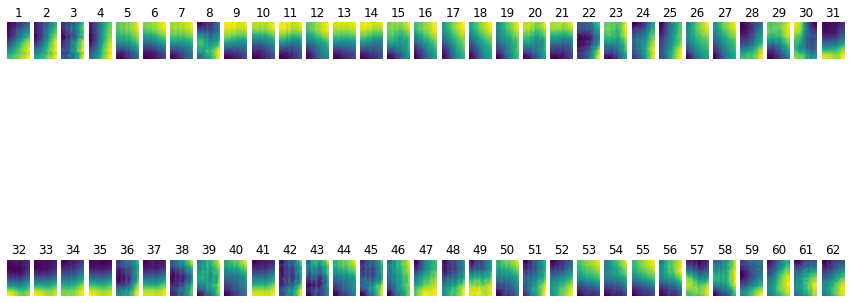

validation loss:0.42526134848594666 accuracy:0.8496659242761693
0.5
test loss:0.47215476632118225 accuracy:0.8433349335893743
0.7385182


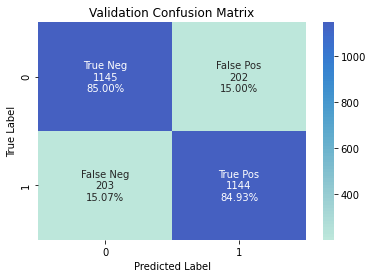

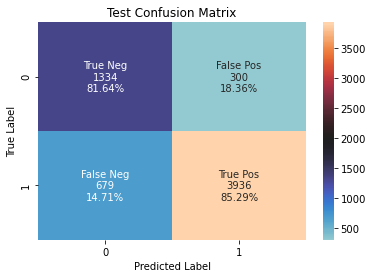

date:180329, rec:002, time:5595.0, label:1.0
Original data 62 CH


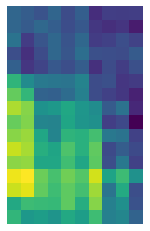

In [34]:
load_path = model_saving_path
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*freq*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_beta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_beta.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 16, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_beta, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with no regularization - Gamma

In [35]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 'all'
freq = 26

model = GLM(62*26*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [36]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}__REDUCEsum_valbalanced_gamma.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6124169230461121
Val loss for epoch 0: 0.4569363296031952
Train loss for epoch 1: 0.41581448912620544
Val loss for epoch 1: 0.4487287998199463
1
Train loss for epoch 2: 0.3950214385986328
Val loss for epoch 2: 0.4457656443119049
2
Train loss for epoch 3: 0.3887629806995392
Val loss for epoch 3: 0.5708377957344055
Train loss for epoch 4: 0.3553367555141449
Val loss for epoch 4: 0.5432484149932861
Train loss for epoch 5: 0.36465856432914734
Val loss for epoch 5: 0.47733694314956665
Train loss for epoch 6: 0.3342125415802002
Val loss for epoch 6: 0.45959052443504333
Train loss for epoch 7: 0.33892589807510376
Val loss for epoch 7: 0.49905335903167725
Train loss for epoch 8: 0.3150384724140167
Val loss for epoch 8: 0.4705946147441864
Train loss for epoch 9: 0.31887659430503845
Val loss for epoch 9: 0.46649855375289917
Train loss for epoch 10: 0.30859068036079407
Val loss for epoch 10: 0.4748263955116272
Train loss for epoch 11: 0.29768407344818115
Val loss for epo

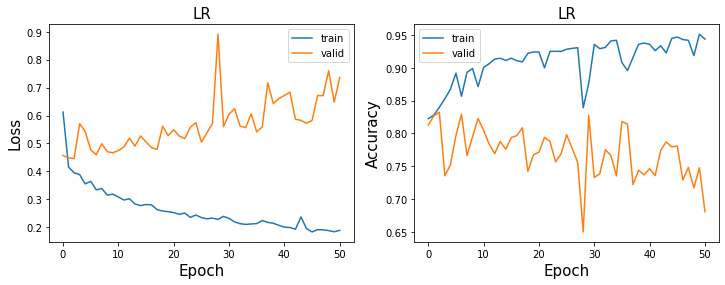

In [37]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [38]:
model_LR = os.listdir(model_saving_path)
results = []
alphas = [0]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_gamma' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
0          2


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGnone0_EPOCH2_REDUCEsum_valbalanced_gamma.pt


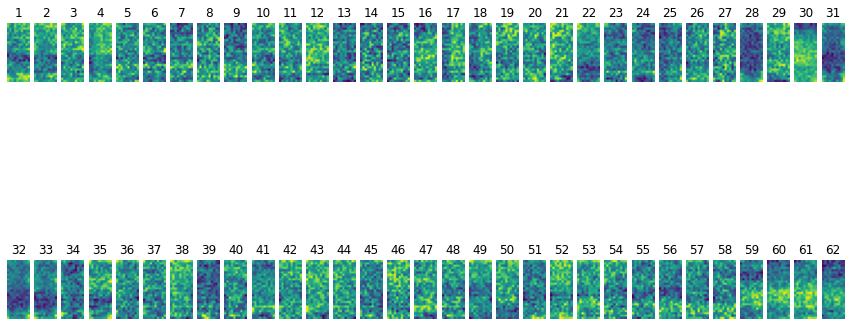

validation loss:0.4457656443119049 accuracy:0.8322197475872308
0.5
test loss:0.48423993587493896 accuracy:0.7818851016162586
0.7385182


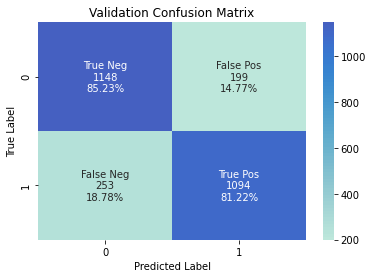

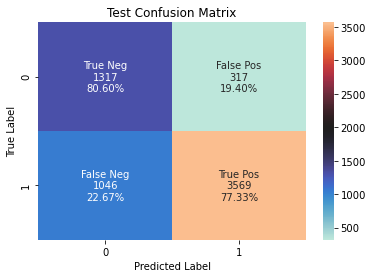

date:180329, rec:003, time:2194.0, label:1.0
Original data 62 CH


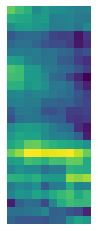

In [40]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*26*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}__REDUCEsum_valbalanced_gamma.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 26, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic regression with L2 regularization - gamma

In [41]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 'all'
freq = 26



Train loss for epoch 0: 0.5265407562255859
Val loss for epoch 0: 0.5103116631507874
Train loss for epoch 1: 0.42350056767463684
Val loss for epoch 1: 0.6697608828544617
Train loss for epoch 2: 0.3840104341506958
Val loss for epoch 2: 0.4969642162322998
2
Train loss for epoch 3: 0.3772474229335785
Val loss for epoch 3: 0.6303959488868713
Train loss for epoch 4: 0.36771315336227417
Val loss for epoch 4: 0.5560770034790039
Train loss for epoch 5: 0.34680718183517456
Val loss for epoch 5: 0.5064038038253784
Train loss for epoch 6: 0.34005188941955566
Val loss for epoch 6: 0.4699207842350006
6
Train loss for epoch 7: 0.3273877501487732
Val loss for epoch 7: 0.4815778136253357
Train loss for epoch 8: 0.31841686367988586
Val loss for epoch 8: 0.7263184785842896
Train loss for epoch 9: 0.320372074842453
Val loss for epoch 9: 0.5552121996879578
Train loss for epoch 10: 0.30810314416885376
Val loss for epoch 10: 0.4693419635295868
10
Train loss for epoch 11: 0.30095526576042175
Val loss for epoc

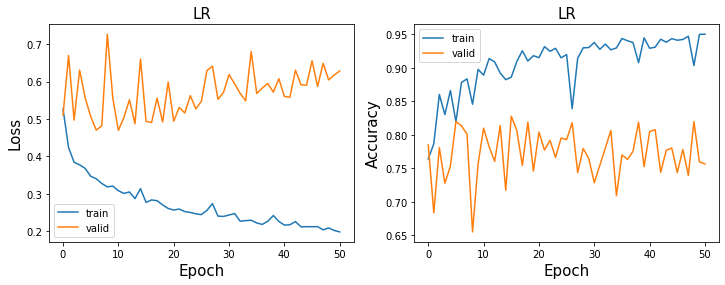

Train loss for epoch 0: 0.6407386064529419
Val loss for epoch 0: 0.5461593270301819
Train loss for epoch 1: 0.5131124258041382
Val loss for epoch 1: 0.5978025794029236
Train loss for epoch 2: 0.5000004172325134
Val loss for epoch 2: 0.5379461050033569
2
Train loss for epoch 3: 0.49133753776550293
Val loss for epoch 3: 0.5164624452590942
3
Train loss for epoch 4: 0.4908333420753479
Val loss for epoch 4: 0.5594134330749512
Train loss for epoch 5: 0.49550050497055054
Val loss for epoch 5: 0.5203148722648621
Train loss for epoch 6: 0.4884192645549774
Val loss for epoch 6: 0.5094186663627625
6
Train loss for epoch 7: 0.4790923297405243
Val loss for epoch 7: 0.5036106705665588
7
Train loss for epoch 8: 0.4645359516143799
Val loss for epoch 8: 0.4997785687446594
8
Train loss for epoch 9: 0.47597286105155945
Val loss for epoch 9: 0.5070374608039856
Train loss for epoch 10: 0.46887126564979553
Val loss for epoch 10: 0.6848270893096924
Train loss for epoch 11: 0.48489153385162354
Val loss for ep

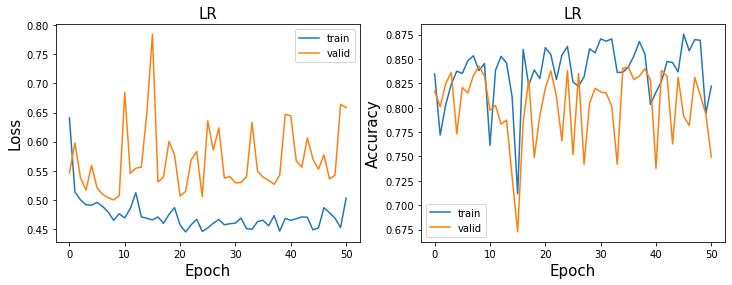

Train loss for epoch 0: 0.717035710811615
Val loss for epoch 0: 0.5672549605369568
Train loss for epoch 1: 0.5468792915344238
Val loss for epoch 1: 0.5575482249259949
1
Train loss for epoch 2: 0.5455995202064514
Val loss for epoch 2: 0.5429109930992126
2
Train loss for epoch 3: 0.5606992840766907
Val loss for epoch 3: 0.5219736695289612
3
Train loss for epoch 4: 0.5158771276473999
Val loss for epoch 4: 0.6459378600120544
Train loss for epoch 5: 0.5394975543022156
Val loss for epoch 5: 0.6116345524787903
Train loss for epoch 6: 0.5630191564559937
Val loss for epoch 6: 0.788385808467865
Train loss for epoch 7: 0.5288111567497253
Val loss for epoch 7: 0.5409083366394043
Train loss for epoch 8: 0.524389386177063
Val loss for epoch 8: 0.5633504986763
Train loss for epoch 9: 0.5176018476486206
Val loss for epoch 9: 0.5611385703086853
Train loss for epoch 10: 0.5122354626655579
Val loss for epoch 10: 0.5241169929504395
Train loss for epoch 11: 0.5071801543235779
Val loss for epoch 11: 0.52580

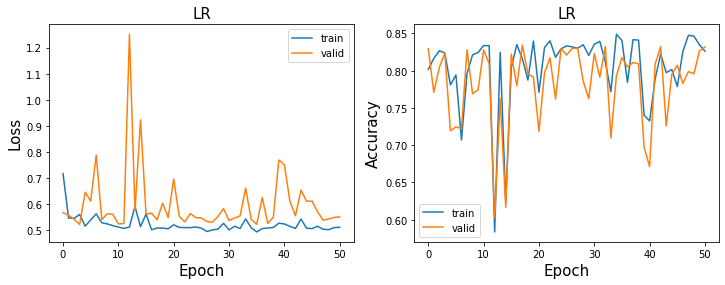

In [42]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    
    model = GLM(62*26*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [43]:
path = model_saving_path
model_LR = os.listdir(path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_gamma' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         10
50         8
100        3


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl21_EPOCH10_REDUCEsum_valbalanced_gamma.pt


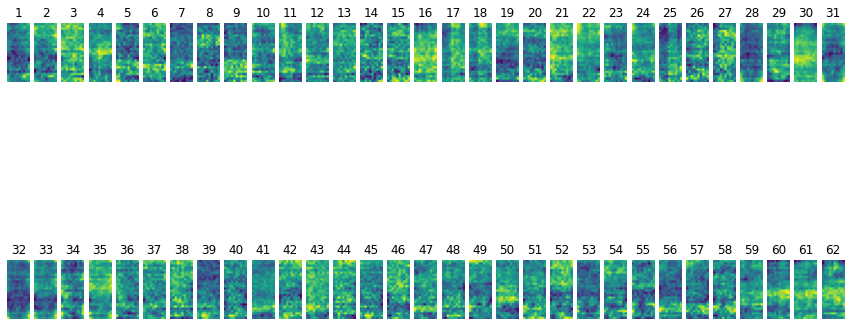

validation loss:0.4693419635295868 accuracy:0.8099480326651819
0.5
test loss:0.44125795364379883 accuracy:0.8134101456232997
0.7385182


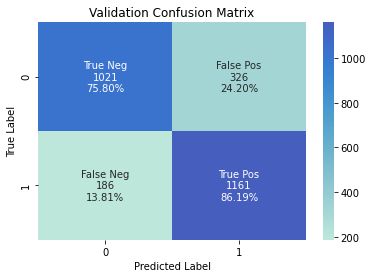

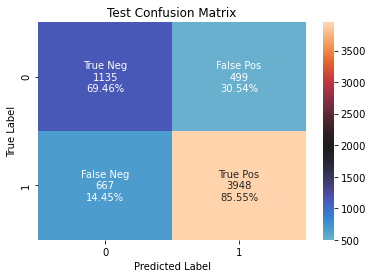

date:180327, rec:006, time:5318.0, label:1.0
Original data 62 CH


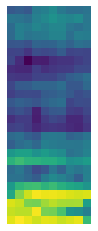

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl250_EPOCH8_REDUCEsum_valbalanced_gamma.pt


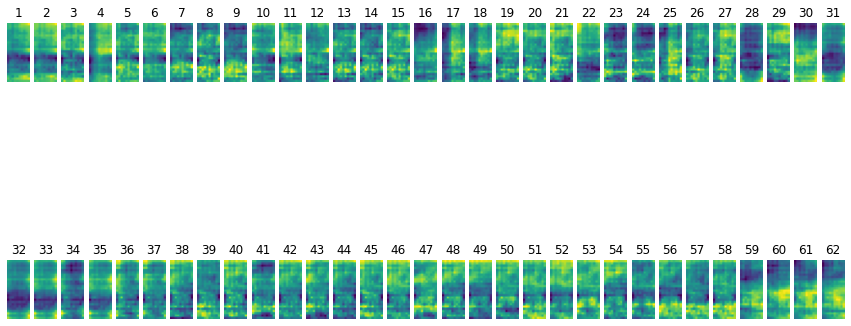

validation loss:0.4997785687446594 accuracy:0.8426132145508537
0.5
test loss:0.517159640789032 accuracy:0.8028484557529205
0.7385182


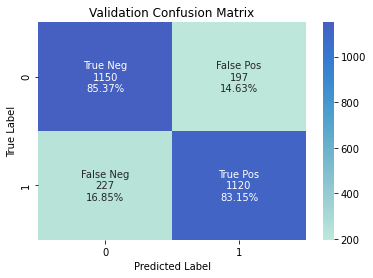

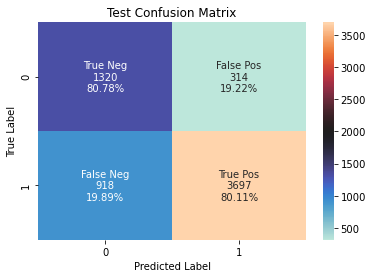

date:180329, rec:003, time:2194.0, label:1.0
Original data 62 CH


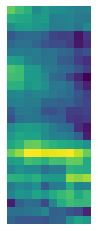

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGl2100_EPOCH3_REDUCEsum_valbalanced_gamma.pt


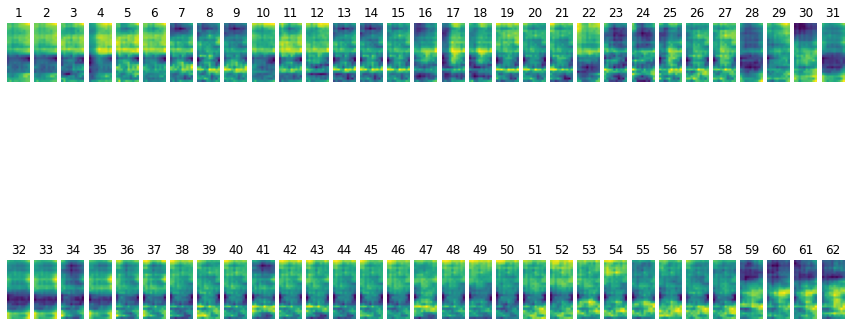

validation loss:0.5219736695289612 accuracy:0.823682256867112
0.5
test loss:0.5461942553520203 accuracy:0.7964474315890543
0.7385182


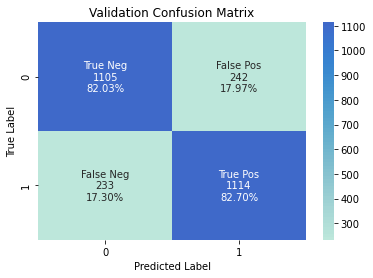

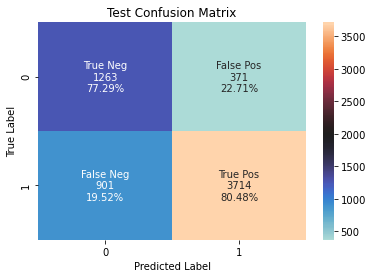

date:180329, rec:003, time:2194.0, label:1.0
Original data 62 CH


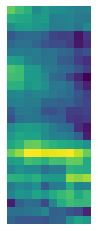

In [44]:

for i,(index,row) in enumerate(best_results.iterrows()):
    
    load_path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*26*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 26, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()

### Logistic Regression with finite difference regularization-gamma

In [6]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 'all'
freq = 26


Train loss for epoch 0: 0.5218532681465149
Val loss for epoch 0: 0.4986453652381897
Train loss for epoch 1: 0.412457138299942
Val loss for epoch 1: 0.46113884449005127
1
Train loss for epoch 2: 0.4102064073085785
Val loss for epoch 2: 0.5314478874206543
Train loss for epoch 3: 0.3854105770587921
Val loss for epoch 3: 0.5949159264564514
Train loss for epoch 4: 0.3910033106803894
Val loss for epoch 4: 0.46913304924964905
Train loss for epoch 5: 0.36845165491104126
Val loss for epoch 5: 0.4504302740097046
5
Train loss for epoch 6: 0.3443642854690552
Val loss for epoch 6: 0.533244788646698
Train loss for epoch 7: 0.3520471751689911
Val loss for epoch 7: 0.4791174829006195
Train loss for epoch 8: 0.3360675275325775
Val loss for epoch 8: 0.506352961063385
Train loss for epoch 9: 0.3219291567802429
Val loss for epoch 9: 0.5834798812866211
Train loss for epoch 10: 0.32212361693382263
Val loss for epoch 10: 0.4815858006477356
Train loss for epoch 11: 0.3024649918079376
Val loss for epoch 11: 0.

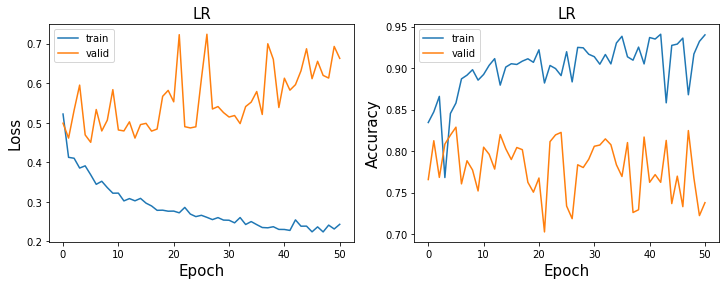

Train loss for epoch 0: 0.8362869024276733
Val loss for epoch 0: 0.5458455085754395
Train loss for epoch 1: 0.4783327281475067
Val loss for epoch 1: 0.4940492808818817
1
Train loss for epoch 2: 0.4409494400024414
Val loss for epoch 2: 0.4953966736793518
Train loss for epoch 3: 0.4411269426345825
Val loss for epoch 3: 0.46106818318367004
3
Train loss for epoch 4: 0.4318375885486603
Val loss for epoch 4: 0.4649333357810974
Train loss for epoch 5: 0.43453314900398254
Val loss for epoch 5: 0.46318843960762024
Train loss for epoch 6: 0.43630361557006836
Val loss for epoch 6: 0.5818657279014587
Train loss for epoch 7: 0.4205733835697174
Val loss for epoch 7: 0.4682222306728363
Train loss for epoch 8: 0.4158897399902344
Val loss for epoch 8: 0.5175817012786865
Train loss for epoch 9: 0.42267024517059326
Val loss for epoch 9: 0.580389678478241
Train loss for epoch 10: 0.411578506231308
Val loss for epoch 10: 0.5175418853759766
Train loss for epoch 11: 0.4211179316043854
Val loss for epoch 11: 

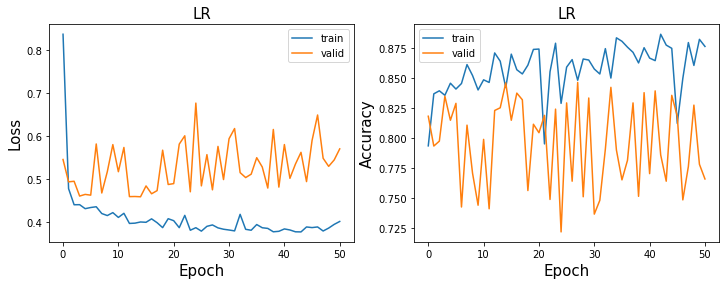

Train loss for epoch 0: 0.8573920130729675
Val loss for epoch 0: 0.5404415726661682
Train loss for epoch 1: 0.4700371026992798
Val loss for epoch 1: 0.46236398816108704
1
Train loss for epoch 2: 0.45019304752349854
Val loss for epoch 2: 0.47644656896591187
Train loss for epoch 3: 0.44636255502700806
Val loss for epoch 3: 0.5126550793647766
Train loss for epoch 4: 0.44999027252197266
Val loss for epoch 4: 0.6778068542480469
Train loss for epoch 5: 0.4578911364078522
Val loss for epoch 5: 0.4761674702167511
Train loss for epoch 6: 0.4439370632171631
Val loss for epoch 6: 0.6102347373962402
Train loss for epoch 7: 0.45044249296188354
Val loss for epoch 7: 0.4685535430908203
Train loss for epoch 8: 0.43059617280960083
Val loss for epoch 8: 0.5333359241485596
Train loss for epoch 9: 0.4312460422515869
Val loss for epoch 9: 0.5742819905281067
Train loss for epoch 10: 0.4417272210121155
Val loss for epoch 10: 0.4551568925380707
10
Train loss for epoch 11: 0.4284183382987976
Val loss for epoch

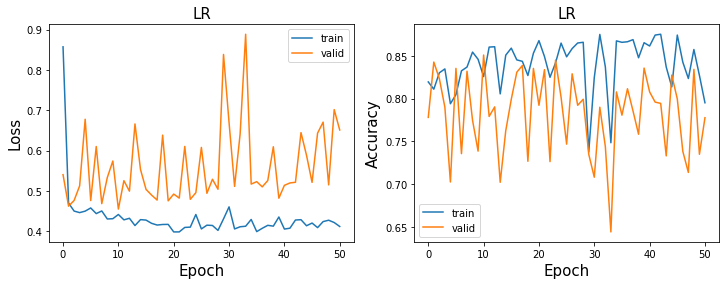

In [7]:
for alpha in alphas:
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []
    model = GLM(62*26*10).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,freq = freq)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type) # new

In [8]:

model_LR = os.listdir(model_saving_path)
results = []
alphas = [1,50,100]
for alpha in alphas:
    best_result = 0
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if 'LR_CHall_' in s and reg_alpha in s and '_valbalanced' in s and '_gamma' in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            if epoch_result>best_result and epoch_result != 50:
                best_result = epoch_result

    results.append([alpha,best_result])

    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1          8
50        14
100       10


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff1_EPOCH8_REDUCEsum_valbalanced_gamma.pt


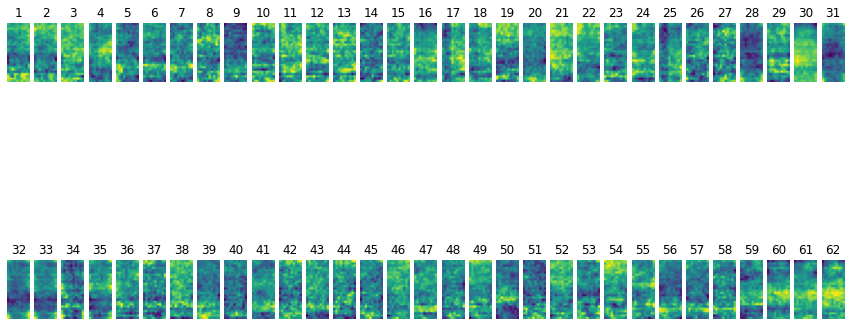

validation loss:0.4548344016075134 accuracy:0.8311061618411284
0.5
test loss:0.46691203117370605 accuracy:0.8034885581693071
0.7385182


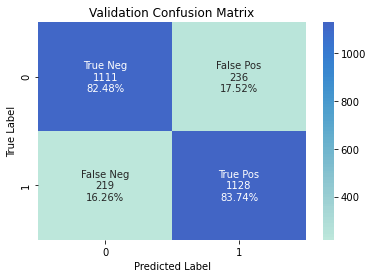

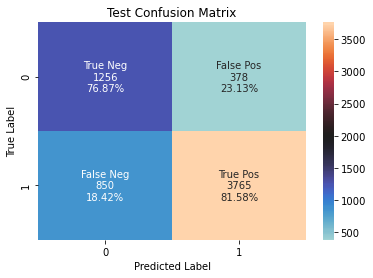

date:180329, rec:006, time:3699.0, label:1.0
Original data 62 CH


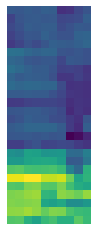

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff50_EPOCH14_REDUCEsum_valbalanced_gamma.pt


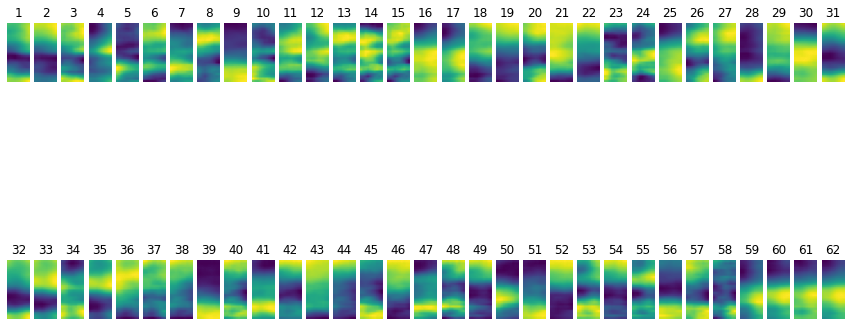

validation loss:0.45942890644073486 accuracy:0.8459539717891611
0.5
test loss:0.49157217144966125 accuracy:0.7930868939030244
0.7385182


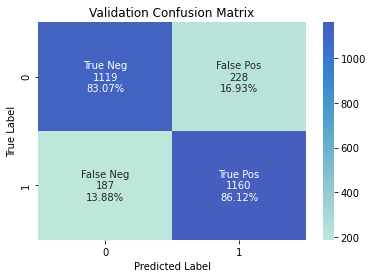

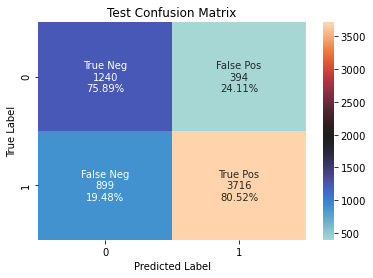

date:180329, rec:006, time:3699.0, label:1.0
Original data 62 CH


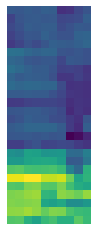

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models/LR_CHall_LOSSbce_REGfinite_diff100_EPOCH10_REDUCEsum_valbalanced_gamma.pt


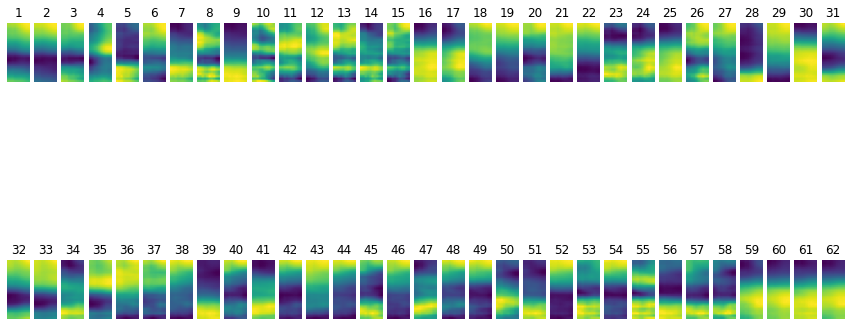

validation loss:0.4551568925380707 accuracy:0.8507795100222717
0.5
test loss:0.5060608386993408 accuracy:0.7849255880940951
0.7385182


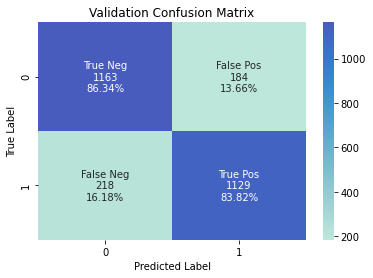

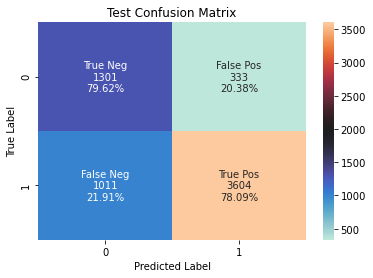

date:180329, rec:006, time:3699.0, label:1.0
Original data 62 CH


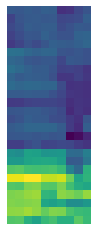

In [9]:
load_path = model_saving_path
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(62*26*10).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum_valbalanced_gamma.pt'.format(load_path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show features
    weights = model.linear.weight.view(62, 26, 10)
    plt.figure(figsize=(15,8))
    for i in range(62):
        weights_sub = weights[i].detach().cpu()
        plt.subplot(2,31,i+1)
        plt.axis('off')
        plt.imshow(weights_sub)
        plt.title(str(i+1))
        # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate validation accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    ## Calculate test accuracy and test loss
    test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader_gamma, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device,freq = freq)
    print('test loss:{} accuracy:{}'.format(test_loss, test_acc))
    print(np.mean(np.concatenate(test_labels)))
    
    ## Confusion matrix-validation
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Confusion matrix-test
    predictions_test = np.concatenate(test_preds)
    labels_test = np.concatenate(test_labels)

    df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

    cm_test = confusion_matrix(labels_test, predictions_test)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_test.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
    ax.set_title('Test Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()